# TMDB Box Office Predictions 
In this project, we will use supervised machine learning models to predict the box office revenue of hundreds of films. The film industry is a multi-billion-dollar business, and offers an immense amount of data about movies, all available through the internet. 

In this project, we will use supervised machine learning techniques to predict the box office revenue of hundreds of films. This research could be used to help investors in the business avoid risks. The models predict an approximate success rate of a movie based on its features by analyzing data from The Movie Data Base.

Source: https://www.kaggle.com/c/tmdb-box-office-prediction/data?select=train.csv

In [1]:
#import dependencies 
import pandas as pd
import numpy as np
import json
from collections import Counter
from pprint import pprint
import requests
import os 
import csv 
from datetime import datetime
from xgboost import XGBRegressor
from config import api_key

In [2]:
api_key

'2b040e4d0e351cddb4c84f334d4aa74e'

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remerging the data
We were not happy with the way the dataset was already split into training and testing frames, so we decided to remerge them in order to conduct our own split. However, the test.csv did not have a revenue column. To fix this issue we created an API pull to obtain all of the films' in the test data revenue.

In [4]:
#make all columns visible
pd.set_option('display.max_columns', None)

In [5]:
#Import Datasets from Kaggle
train_data = pd.read_csv('Resources/train.csv')
test_data= pd.read_csv('Resources/test.csv')

# Pulling from the TMDB API
The TMDB requires a "movie_id" in order to access the many different attributes of a film, because our original datasets did not have a movie_id column, we first pulled information based on the imdb_id. Once we had the corresponding titles, we added the movie_id information into the dataframe and then did another API pull for the revenue. 

In [6]:
url = "https://api.themoviedb.org/3/find/"
api_key = "?api_key="+ api_key + "&query=" + "&external_source=imdb_id"

In [7]:
#create empty list to store data
missing= []
for imdb in test_data["imdb_id"]:
    missing.append(imdb)

In [8]:
responses=[]
tmdb_id= []
movie_title=[]

for movie in missing:
    try: 
        movie_data = requests.get(url + movie + api_key).json()
        responses.append(movie_data['movie_results'])
        movie_title.append(movie_data['movie_results'][0]['title'])
        tmdb_id.append(movie_data['movie_results'][0]['id'])
        print(f"The Film {movie_data['movie_results'][0]['title']}.")
        print(f"Has a TMDB ID {movie_data['movie_results'][0]['id']}.")
       
    except(KeyError, IndexError):
        print("Missing Results.")
        
    print("------------")

The Film Pokémon: The Rise of Darkrai.
Has a TMDB ID 25961.
------------
The Film Attack of the 50 Foot Woman.
Has a TMDB ID 18724.
------------
The Film Addicted to Love.
Has a TMDB ID 2058.
------------
The Film Incendies.
Has a TMDB ID 46738.
------------
The Film Inside Deep Throat.
Has a TMDB ID 12228.
------------
The Film SubUrbia.
Has a TMDB ID 28059.
------------
The Film Three.
Has a TMDB ID 53256.
------------
The Film The Tigger Movie.
Has a TMDB ID 15655.
------------
The Film Becoming Jane.
Has a TMDB ID 2977.
------------
The Film Toy Story 2.
Has a TMDB ID 863.
------------
The Film Cruel World.
Has a TMDB ID 44250.
------------
The Film Girlhood.
Has a TMDB ID 266082.
------------
The Film The Gods Must Be Crazy.
Has a TMDB ID 8393.
------------
The Film Raising Victor Vargas.
Has a TMDB ID 25461.
------------
The Film The Brothers Bloom.
Has a TMDB ID 21755.
------------
The Film Beautiful Boy.
Has a TMDB ID 59437.
------------
The Film Hot Tub Time Machine.
Has a TMD

The Film Predator.
Has a TMDB ID 106.
------------
The Film Absence of Malice.
Has a TMDB ID 19429.
------------
The Film Last Summer.
Has a TMDB ID 38096.
------------
The Film Hitch.
Has a TMDB ID 8488.
------------
The Film Lay the Favorite.
Has a TMDB ID 84305.
------------
The Film Eight Crazy Nights.
Has a TMDB ID 13376.
------------
The Film Atanarjuat: The Fast Runner.
Has a TMDB ID 13245.
------------
The Film Crazy Heart.
Has a TMDB ID 25196.
------------
The Film The English Teacher.
Has a TMDB ID 174321.
------------
The Film Street Fighter: The Legend of Chun-Li.
Has a TMDB ID 15268.
------------
The Film Under Siege 2: Dark Territory.
Has a TMDB ID 3512.
------------
The Film Elephant.
Has a TMDB ID 1807.
------------
The Film Under the Skin.
Has a TMDB ID 97370.
------------
The Film Learning to Drive.
Has a TMDB ID 284286.
------------
The Film City Island.
Has a TMDB ID 28053.
------------
The Film A Dangerous Method.
Has a TMDB ID 48231.
------------
The Film Justice 

The Film Captain Corelli's Mandolin.
Has a TMDB ID 1722.
------------
The Film True Grit.
Has a TMDB ID 17529.
------------
The Film Hancock.
Has a TMDB ID 8960.
------------
The Film The Low Down.
Has a TMDB ID 153141.
------------
The Film The Bellboy.
Has a TMDB ID 15788.
------------
The Film The BFG.
Has a TMDB ID 267935.
------------
The Film Doctor Zhivago.
Has a TMDB ID 907.
------------
The Film August Rush.
Has a TMDB ID 5123.
------------
The Film Haute Cuisine.
Has a TMDB ID 139651.
------------
The Film Adam.
Has a TMDB ID 22051.
------------
The Film Twice Born.
Has a TMDB ID 121642.
------------
The Film Brokeback Mountain.
Has a TMDB ID 142.
------------
The Film The Right Stuff.
Has a TMDB ID 9549.
------------
The Film Manchester by the Sea.
Has a TMDB ID 334541.
------------
The Film Sin City: A Dame to Kill For.
Has a TMDB ID 189.
------------
The Film The People vs. Larry Flynt.
Has a TMDB ID 1630.
------------
The Film JCVD.
Has a TMDB ID 13672.
------------
The F

The Film Psycho.
Has a TMDB ID 539.
------------
The Film Elf.
Has a TMDB ID 10719.
------------
The Film Escape From Alcatraz.
Has a TMDB ID 10734.
------------
The Film Clash of the Titans.
Has a TMDB ID 18823.
------------
The Film The Mother.
Has a TMDB ID 59210.
------------
The Film House at the End of the Street.
Has a TMDB ID 82505.
------------
The Film Beyond the Hills.
Has a TMDB ID 103740.
------------
The Film Ratatouille.
Has a TMDB ID 2062.
------------
The Film A Few Less Men.
Has a TMDB ID 413391.
------------
The Film Tamara.
Has a TMDB ID 10263.
------------
The Film The Way We Were.
Has a TMDB ID 10236.
------------
The Film Hide and Seek.
Has a TMDB ID 11096.
------------
The Film The Pit and the Pendulum.
Has a TMDB ID 28501.
------------
The Film Footloose.
Has a TMDB ID 1788.
------------
The Film Kong: Skull Island.
Has a TMDB ID 293167.
------------
The Film Trick or Treat.
Has a TMDB ID 25438.
------------
The Film Son of Rambow.
Has a TMDB ID 13258.
--------

The Film Conan the Barbarian.
Has a TMDB ID 37430.
------------
The Film Dr. Dolittle 2.
Has a TMDB ID 10808.
------------
The Film 3 Days to Kill.
Has a TMDB ID 192102.
------------
The Film Canadian Bacon.
Has a TMDB ID 1775.
------------
The Film Grown Ups 2.
Has a TMDB ID 109418.
------------
The Film Jobs.
Has a TMDB ID 115782.
------------
The Film The Eternal Zero.
Has a TMDB ID 248087.
------------
The Film Old Dogs.
Has a TMDB ID 22949.
------------
The Film The Guest.
Has a TMDB ID 241848.
------------
The Film Night of the Demons.
Has a TMDB ID 24924.
------------
The Film Soccer Days.
Has a TMDB ID 54148.
------------
The Film Kismat Konnection.
Has a TMDB ID 15467.
------------
The Film On Her Majesty's Secret Service.
Has a TMDB ID 668.
------------
The Film Dirty Girl.
Has a TMDB ID 70695.
------------
The Film House Party.
Has a TMDB ID 16094.
------------
The Film Enemy at the Gates.
Has a TMDB ID 853.
------------
The Film A Heart in Winter.
Has a TMDB ID 48150.
-----

------------
The Film Eternal Summer.
Has a TMDB ID 57005.
------------
The Film Million Dollar Baby.
Has a TMDB ID 70.
------------
The Film Pitch Perfect 2.
Has a TMDB ID 254470.
------------
The Film Sliver.
Has a TMDB ID 867.
------------
The Film Young Frankenstein.
Has a TMDB ID 3034.
------------
The Film The Return.
Has a TMDB ID 10093.
------------
The Film Dead Silence.
Has a TMDB ID 14001.
------------
The Film Half Nelson.
Has a TMDB ID 7859.
------------
The Film Pokémon the Movie: Genesect and the Legend Awakened.
Has a TMDB ID 227679.
------------
The Film Amelia.
Has a TMDB ID 8915.
------------
The Film The Afflicted.
Has a TMDB ID 101501.
------------
The Film Flight.
Has a TMDB ID 87502.
------------
The Film Edward Scissorhands.
Has a TMDB ID 162.
------------
The Film Me and Orson Welles.
Has a TMDB ID 12404.
------------
The Film The Hills Have Eyes.
Has a TMDB ID 9792.
------------
The Film No End in Sight.
Has a TMDB ID 12901.
------------
The Film Recess: Schoo

The Film The Golden Child.
Has a TMDB ID 10136.
------------
The Film Falling from Grace.
Has a TMDB ID 70026.
------------
The Film Stardust.
Has a TMDB ID 2270.
------------
The Film Fair Game.
Has a TMDB ID 11859.
------------
The Film The Lady.
Has a TMDB ID 77878.
------------
The Film Farewell, My Lovely.
Has a TMDB ID 1835.
------------
The Film Men with Brooms.
Has a TMDB ID 34341.
------------
The Film Selma.
Has a TMDB ID 273895.
------------
The Film Before I Fall.
Has a TMDB ID 397837.
------------
The Film Kidnapping Mr. Heineken.
Has a TMDB ID 228968.
------------
The Film Geronimo: An American Legend.
Has a TMDB ID 35588.
------------
The Film The Way of the Dragon.
Has a TMDB ID 9462.
------------
The Film In a World....
Has a TMDB ID 157360.
------------
The Film My Way.
Has a TMDB ID 85870.
------------
The Film The Inkwell.
Has a TMDB ID 59930.
------------
The Film Nasty Old People.
Has a TMDB ID 23947.
------------
The Film For All Mankind.
Has a TMDB ID 20423.
---

The Film Treasure Planet.
Has a TMDB ID 9016.
------------
The Film Bulletproof.
Has a TMDB ID 10723.
------------
The Film Coupe de Ville.
Has a TMDB ID 39062.
------------
The Film A Nightmare on Elm Street: The Dream Child.
Has a TMDB ID 10160.
------------
The Film Tomcats.
Has a TMDB ID 10646.
------------
The Film In Her Shoes.
Has a TMDB ID 11931.
------------
The Film Bedknobs and Broomsticks.
Has a TMDB ID 12335.
------------
The Film Erkan & Stefan 2.
Has a TMDB ID 1615.
------------
The Film The Hunt for Red October.
Has a TMDB ID 1669.
------------
The Film The Lincoln Lawyer.
Has a TMDB ID 50348.
------------
The Film Event Horizon.
Has a TMDB ID 8413.
------------
The Film Hellboy.
Has a TMDB ID 1487.
------------
The Film Blue Collar.
Has a TMDB ID 14839.
------------
The Film The Look of Silence.
Has a TMDB ID 267480.
------------
The Film The Opposite Sex.
Has a TMDB ID 301748.
------------
The Film Touch of Evil.
Has a TMDB ID 1480.
------------
The Film Devil.
Has a 

The Film Chasing Papi.
Has a TMDB ID 24621.
------------
The Film Stop-Loss.
Has a TMDB ID 8988.
------------
The Film Cry, the Beloved Country.
Has a TMDB ID 34615.
------------
The Film Sixteen Candles.
Has a TMDB ID 15144.
------------
The Film Parrish.
Has a TMDB ID 28284.
------------
The Film The Boondock Saints II: All Saints Day.
Has a TMDB ID 22821.
------------
The Film The Devil Inside.
Has a TMDB ID 76487.
------------
The Film Lucy.
Has a TMDB ID 240832.
------------
The Film The Other Side of Heaven.
Has a TMDB ID 16651.
------------
The Film My Bloody Valentine.
Has a TMDB ID 14435.
------------
The Film The Ballad of Cable Hogue.
Has a TMDB ID 23330.
------------
The Film Kiss Kiss Bang Bang.
Has a TMDB ID 5236.
------------
The Film Torque.
Has a TMDB ID 10718.
------------
The Film Rampage.
Has a TMDB ID 99749.
------------
The Film Badlapur.
Has a TMDB ID 323517.
------------
The Film Bewitched.
Has a TMDB ID 9722.
------------
The Film Return from Witch Mountain.
Ha

The Film Riff-Raff.
Has a TMDB ID 59058.
------------
The Film Mr. Deeds.
Has a TMDB ID 2022.
------------
The Film An American Rhapsody.
Has a TMDB ID 37920.
------------
The Film The Dinner.
Has a TMDB ID 401546.
------------
The Film The Waterboy.
Has a TMDB ID 10663.
------------
The Film Never Die Alone.
Has a TMDB ID 20304.
------------
The Film Last Holiday.
Has a TMDB ID 17379.
------------
The Film Beastly.
Has a TMDB ID 38117.
------------
The Film Transylmania.
Has a TMDB ID 37190.
------------
The Film Kubo and the Two Strings.
Has a TMDB ID 313297.
------------
The Film The Five-Year Engagement.
Has a TMDB ID 72207.
------------
The Film The Faculty.
Has a TMDB ID 9276.
------------
The Film While You Were Sleeping.
Has a TMDB ID 2064.
------------
The Film The Princess and the Frog.
Has a TMDB ID 10198.
------------
The Film Life.
Has a TMDB ID 6522.
------------
The Film Deuce Bigalow: European Gigolo.
Has a TMDB ID 11453.
------------
The Film He Loves Me… He Loves Me N

The Film Far and Away.
Has a TMDB ID 11259.
------------
The Film Fast & Furious 6.
Has a TMDB ID 82992.
------------
The Film Ender's Game.
Has a TMDB ID 80274.
------------
The Film Hoodwinked!.
Has a TMDB ID 10982.
------------
The Film Moolaadé.
Has a TMDB ID 39504.
------------
The Film Red Dragon.
Has a TMDB ID 9533.
------------
The Film Saw VI.
Has a TMDB ID 22804.
------------
The Film Universal Soldier: Day of Reckoning.
Has a TMDB ID 122857.
------------
The Film The Emperor's New Groove.
Has a TMDB ID 11688.
------------
The Film Romanzo Criminale.
Has a TMDB ID 14375.
------------
The Film Have Fun, Vasya!.
Has a TMDB ID 430263.
------------
The Film Sky Captain and the World of Tomorrow.
Has a TMDB ID 5137.
------------
The Film The Dirty Dozen.
Has a TMDB ID 1654.
------------
The Film The Debt.
Has a TMDB ID 48289.
------------
The Film The Ringer.
Has a TMDB ID 9927.
------------
The Film Remember the Titans.
Has a TMDB ID 10637.
------------
The Film Being There.
Has 

The Film Bullitt.
Has a TMDB ID 916.
------------
The Film O Brother, Where Art Thou?.
Has a TMDB ID 134.
------------
The Film Room.
Has a TMDB ID 264644.
------------
The Film Encounter of the Spooky Kind.
Has a TMDB ID 15724.
------------
The Film Management.
Has a TMDB ID 21583.
------------
The Film The Thieves.
Has a TMDB ID 124157.
------------
The Film Death Wish 3.
Has a TMDB ID 24873.
------------
The Film Mississippi Grind.
Has a TMDB ID 309242.
------------
The Film The Program.
Has a TMDB ID 271736.
------------
The Film Quartet.
Has a TMDB ID 121826.
------------
The Film Spellbound.
Has a TMDB ID 4174.
------------
The Film Hard Eight.
Has a TMDB ID 8052.
------------
The Film Cruel Intentions.
Has a TMDB ID 796.
------------
The Film Brown Sugar.
Has a TMDB ID 37964.
------------
The Film City of Ember.
Has a TMDB ID 13600.
------------
The Film Above the Law.
Has a TMDB ID 9395.
------------
The Film Big Fish & Begonia.
Has a TMDB ID 271706.
------------
The Film Trumb

The Film Serpico.
Has a TMDB ID 9040.
------------
The Film Before Night Falls.
Has a TMDB ID 5001.
------------
The Film Once.
Has a TMDB ID 5723.
------------
The Film Critters.
Has a TMDB ID 3980.
------------
The Film Beowulf & Grendel.
Has a TMDB ID 5471.
------------
The Film BASEketball.
Has a TMDB ID 14013.
------------
The Film The War of the Worlds.
Has a TMDB ID 8974.
------------
The Film Fire in the Sky.
Has a TMDB ID 15613.
------------
The Film Code Name: The Cleaner.
Has a TMDB ID 14396.
------------
The Film Underworld: Blood Wars.
Has a TMDB ID 346672.
------------
The Film Roustabout.
Has a TMDB ID 2094.
------------
The Film A Dark Truth.
Has a TMDB ID 138376.
------------
The Film Centurion.
Has a TMDB ID 23759.
------------
The Film Testament.
Has a TMDB ID 21259.
------------
The Film Here Comes the Devil.
Has a TMDB ID 123359.
------------
The Film Dostana.
Has a TMDB ID 14071.
------------
The Film Annie Get Your Gun.
Has a TMDB ID 25209.
------------
The Film 

The Film Brubaker.
Has a TMDB ID 1623.
------------
The Film Teaching Mrs. Tingle.
Has a TMDB ID 10342.
------------
The Film Beautiful.
Has a TMDB ID 21033.
------------
The Film Where the Heart Is.
Has a TMDB ID 10564.
------------
The Film The Castle.
Has a TMDB ID 13852.
------------
The Film Delicacy.
Has a TMDB ID 81342.
------------
The Film Forks Over Knives.
Has a TMDB ID 64288.
------------
The Film Panic.
Has a TMDB ID 20637.
------------
The Film The Breakup Guru.
Has a TMDB ID 270724.
------------
The Film Legend of the Fist: The Return of Chen Zhen.
Has a TMDB ID 47854.
------------
The Film Love Actually.
Has a TMDB ID 508.
------------
The Film Gordy.
Has a TMDB ID 47867.
------------
The Film Rad.
Has a TMDB ID 13841.
------------
The Film American Reunion.
Has a TMDB ID 71552.
------------
The Film Honey, I Shrunk the Kids.
Has a TMDB ID 9354.
------------
The Film Charter Trip 2: Snowroller.
Has a TMDB ID 19181.
------------
The Film Driving Miss Daisy.
Has a TMDB ID

The Film The Grifters.
Has a TMDB ID 18129.
------------
The Film Gloria.
Has a TMDB ID 160068.
------------
The Film Spring.
Has a TMDB ID 241855.
------------
The Film Mr. Saturday Night.
Has a TMDB ID 54087.
------------
The Film Last Chance Harvey.
Has a TMDB ID 16409.
------------
The Film Lake Placid.
Has a TMDB ID 9825.
------------
The Film Primal Fear.
Has a TMDB ID 1592.
------------
The Film The Child.
Has a TMDB ID 11490.
------------
The Film Winter's Bone.
Has a TMDB ID 39013.
------------
The Film Parasite.
Has a TMDB ID 48311.
------------
The Film Music Within.
Has a TMDB ID 14820.
------------
The Film The Samaritan.
Has a TMDB ID 98339.
------------
The Film Fear and Loathing in Las Vegas.
Has a TMDB ID 1878.
------------
The Film The Bridges of Madison County.
Has a TMDB ID 688.
------------
The Film Mongol: The Rise of Genghis Khan.
Has a TMDB ID 12246.
------------
The Film Riddick.
Has a TMDB ID 87421.
------------
The Film Black Book.
Has a TMDB ID 9075.
-------

The Film Losing Isaiah.
Has a TMDB ID 28313.
------------
The Film Forces of Nature.
Has a TMDB ID 1641.
------------
The Film Secret Admirer.
Has a TMDB ID 24742.
------------
The Film 200 Cigarettes.
Has a TMDB ID 15256.
------------
The Film Yours, Mine & Ours.
Has a TMDB ID 13499.
------------
The Film The International.
Has a TMDB ID 4959.
------------
The Film Convoy.
Has a TMDB ID 9584.
------------
The Film Black and White.
Has a TMDB ID 38809.
------------
The Film Dragonslayer.
Has a TMDB ID 848.
------------
The Film The Lucky Island.
Has a TMDB ID 250251.
------------
The Film Shaft in Africa.
Has a TMDB ID 494.
------------
The Film The Hollywood Knights.
Has a TMDB ID 21879.
------------
The Film Bully.
Has a TMDB ID 9517.
------------
The Film Serena.
Has a TMDB ID 164251.
------------
The Film Ondine.
Has a TMDB ID 38448.
------------
The Film Frailty.
Has a TMDB ID 12149.
------------
The Film It's a Boy Girl Thing.
Has a TMDB ID 37725.
------------
The Film Dark Water

The Film Platoon.
Has a TMDB ID 792.
------------
The Film Wanted.
Has a TMDB ID 22717.
------------
The Film 12.
Has a TMDB ID 20714.
------------
The Film Diary of the Dead.
Has a TMDB ID 13025.
------------
The Film How to Lose Friends & Alienate People.
Has a TMDB ID 13092.
------------
The Film I Think I Do.
Has a TMDB ID 19797.
------------
The Film Pump Up the Volume.
Has a TMDB ID 8428.
------------
The Film 2001: A Space Odyssey.
Has a TMDB ID 62.
------------
The Film Desmundo.
Has a TMDB ID 161244.
------------
The Film Divine Trash.
Has a TMDB ID 53380.
------------
The Film 30 Minutes or Less.
Has a TMDB ID 62206.
------------
The Film Mad Love.
Has a TMDB ID 47608.
------------
The Film The Dreamers.
Has a TMDB ID 1278.
------------
The Film Alvin and the Chipmunks: Chipwrecked.
Has a TMDB ID 55301.
------------
The Film Trail of the Pink Panther.
Has a TMDB ID 9699.
------------
The Film Eraserhead.
Has a TMDB ID 985.
------------
The Film Bandit Queen.
Has a TMDB ID 147

The Film Bean.
Has a TMDB ID 1281.
------------
The Film The Break-Up.
Has a TMDB ID 9767.
------------
The Film Steel Magnolias.
Has a TMDB ID 10860.
------------
The Film Salsa.
Has a TMDB ID 38909.
------------
The Film The Mother of Tears.
Has a TMDB ID 15206.
------------
The Film Bright Star.
Has a TMDB ID 29963.
------------
The Film The Nutty Professor.
Has a TMDB ID 9327.
------------
The Film Chaos Theory.
Has a TMDB ID 12912.
------------
The Film The Lords of Flatbush.
Has a TMDB ID 38925.
------------
The Film The Ice Storm.
Has a TMDB ID 68924.
------------
The Film Eegah.
Has a TMDB ID 31287.
------------
The Film Criminal.
Has a TMDB ID 302156.
------------
The Film The Santa Clause 2.
Has a TMDB ID 9021.
------------
The Film Rocky Balboa.
Has a TMDB ID 1246.
------------
The Film Bitter Harvest.
Has a TMDB ID 403390.
------------
The Film Miss Peregrine's Home for Peculiar Children.
Has a TMDB ID 283366.
------------
The Film Twisted.
Has a TMDB ID 13572.
------------

The Film Welcome.
Has a TMDB ID 20294.
------------
The Film Train to Busan.
Has a TMDB ID 396535.
------------
The Film 3 Idiots.
Has a TMDB ID 20453.
------------
The Film Marshland.
Has a TMDB ID 236735.
------------
The Film Dopamine.
Has a TMDB ID 54973.
------------
The Film The Contract.
Has a TMDB ID 1441.
------------
The Film Sleeping Beauty.
Has a TMDB ID 10882.
------------
The Film The Crow: City of Angels.
Has a TMDB ID 10546.
------------
The Film Paradise Now.
Has a TMDB ID 67.
------------
The Film In Time.
Has a TMDB ID 49530.
------------
The Film Critters 2.
Has a TMDB ID 10127.
------------
The Film Butter.
Has a TMDB ID 79697.
------------
The Film Chopper.
Has a TMDB ID 9519.
------------
The Film The Pebble and the Penguin.
Has a TMDB ID 54648.
------------
The Film It's a Wonderful Life.
Has a TMDB ID 1585.
------------
The Film The Blackcoat's Daughter.
Has a TMDB ID 334536.
------------
The Film DragonHeart.
Has a TMDB ID 8840.
------------
The Film Hell or H

The Film The Greatest Game Ever Played.
Has a TMDB ID 15487.
------------
The Film Planet of the Apes.
Has a TMDB ID 869.
------------
The Film The Final Countdown.
Has a TMDB ID 8738.
------------
The Film Sleepless.
Has a TMDB ID 324542.
------------
The Film T2 Trainspotting.
Has a TMDB ID 180863.
------------
The Film A Royal Affair.
Has a TMDB ID 88273.
------------
The Film Bad Milo!.
Has a TMDB ID 172828.
------------
The Film Natural Born Killers.
Has a TMDB ID 241.
------------
The Film Holy Matrimony.
Has a TMDB ID 2348.
------------
The Film The In-Laws.
Has a TMDB ID 5146.
------------
The Film Small Soldiers.
Has a TMDB ID 11551.
------------
The Film A Long Way Down.
Has a TMDB ID 141043.
------------
The Film Bad Medicine.
Has a TMDB ID 78235.
------------
The Film The Box.
Has a TMDB ID 22825.
------------
The Film Auto Focus.
Has a TMDB ID 14112.
------------
The Film Nights of Cabiria.
Has a TMDB ID 19426.
------------
The Film Harry Potter and the Order of the Phoeni

The Film Insomnia.
Has a TMDB ID 320.
------------
The Film Ghost in the Shell: The New Movie.
Has a TMDB ID 334376.
------------
The Film Firestarter.
Has a TMDB ID 11495.
------------
The Film The Lucky One.
Has a TMDB ID 77877.
------------
The Film The Company.
Has a TMDB ID 52036.
------------
The Film Romancing the Stone.
Has a TMDB ID 9326.
------------
The Film Fifty Shades Darker.
Has a TMDB ID 341174.
------------
The Film Diggstown.
Has a TMDB ID 19143.
------------
The Film Employee of the Month.
Has a TMDB ID 9794.
------------
The Film The Silence of the Lambs.
Has a TMDB ID 274.
------------
The Film War of the Worlds.
Has a TMDB ID 74.
------------
The Film The Ghost Writer.
Has a TMDB ID 11439.
------------
The Film The Messengers.
Has a TMDB ID 9966.
------------
The Film The Oranges.
Has a TMDB ID 89008.
------------
The Film Basic Instinct 2.
Has a TMDB ID 3093.
------------
The Film Moneyball.
Has a TMDB ID 60308.
------------
The Film Godzilla.
Has a TMDB ID 929.


The Film Garfield: A Tail of Two Kitties.
Has a TMDB ID 9513.
------------
The Film Highlander.
Has a TMDB ID 8009.
------------
The Film Flash Gordon.
Has a TMDB ID 3604.
------------
The Film The Spirit.
Has a TMDB ID 8285.
------------
The Film What Happens in Vegas.
Has a TMDB ID 9029.
------------
The Film Sans Soleil.
Has a TMDB ID 1563.
------------
The Film City Heat.
Has a TMDB ID 16969.
------------
The Film The Greatest Story Ever Told.
Has a TMDB ID 2428.
------------
The Film A Silent Voice: The Movie.
Has a TMDB ID 378064.
------------
The Film The Man from Snowy River.
Has a TMDB ID 24266.
------------
The Film The Last Airbender.
Has a TMDB ID 10196.
------------
The Film Hope Springs.
Has a TMDB ID 82696.
------------
The Film Frankie and Johnny.
Has a TMDB ID 3784.
------------
The Film Cry_Wolf.
Has a TMDB ID 10092.
------------
The Film Brothers.
Has a TMDB ID 7445.
------------
The Film Meet Joe Black.
Has a TMDB ID 297.
------------
The Film Empire of the Sun.
Has

The Film The Little Prince.
Has a TMDB ID 309809.
------------
The Film Ghost Dad.
Has a TMDB ID 10485.
------------
The Film Little Big Man.
Has a TMDB ID 11040.
------------
The Film The Angrez.
Has a TMDB ID 115873.
------------
The Film A Single Shot.
Has a TMDB ID 159932.
------------
The Film Women in Trouble.
Has a TMDB ID 31723.
------------
The Film Tales from the Hood.
Has a TMDB ID 25066.
------------
The Film Bad Guys Always Die.
Has a TMDB ID 375599.
------------
The Film Ohm Shanthi Oshaana.
Has a TMDB ID 257160.
------------
The Film The Forgotten.
Has a TMDB ID 10145.
------------
The Film Marwencol.
Has a TMDB ID 52013.
------------
The Film 42nd Street.
Has a TMDB ID 3062.
------------
The Film The Mambo Kings.
Has a TMDB ID 40082.
------------
The Film The Rocker.
Has a TMDB ID 10186.
------------
The Film Antarctic Journal.
Has a TMDB ID 49190.
------------
The Film Doctor Dolittle.
Has a TMDB ID 16081.
------------
The Film Agora.
Has a TMDB ID 26428.
------------


The Film The Assassination of Jesse James by the Coward Robert Ford.
Has a TMDB ID 4512.
------------
The Film Flirting.
Has a TMDB ID 21828.
------------
The Film Die Hard 2.
Has a TMDB ID 1573.
------------
The Film Little Boy.
Has a TMDB ID 256962.
------------
The Film The Jerk.
Has a TMDB ID 6471.
------------
The Film The Mummy.
Has a TMDB ID 564.
------------
The Film Half Baked.
Has a TMDB ID 9490.
------------
The Film Interstellar.
Has a TMDB ID 157336.
------------
The Film Moms' Night Out.
Has a TMDB ID 252680.
------------
The Film Berlin Syndrome.
Has a TMDB ID 363126.
------------
The Film She Wore a Yellow Ribbon.
Has a TMDB ID 13909.
------------
The Film Pitch Black.
Has a TMDB ID 2787.
------------
The Film The Hot Chick.
Has a TMDB ID 11852.
------------
The Film Self/less.
Has a TMDB ID 238615.
------------
The Film Jiro Dreams of Sushi.
Has a TMDB ID 80767.
------------
The Film Blood Ties.
Has a TMDB ID 190955.
------------
The Film War and Peace.
Has a TMDB ID 1

The Film Cocktail.
Has a TMDB ID 7520.
------------
The Film Friends with Kids.
Has a TMDB ID 80038.
------------
The Film Magic Mike XXL.
Has a TMDB ID 264999.
------------
The Film Déjà Vu.
Has a TMDB ID 7551.
------------
The Film The Shadow.
Has a TMDB ID 8850.
------------
The Film Red Sonja.
Has a TMDB ID 9626.
------------
The Film Restrepo.
Has a TMDB ID 39312.
------------
The Film Town & Country.
Has a TMDB ID 24113.
------------
The Film Splash.
Has a TMDB ID 2619.
------------
The Film Black or White.
Has a TMDB ID 253331.
------------
The Film An Invisible Sign.
Has a TMDB ID 59435.
------------
The Film The Inhabited Island.
Has a TMDB ID 16911.
------------
The Film L.I.E..
Has a TMDB ID 18734.
------------
The Film Emma.
Has a TMDB ID 3573.
------------
The Film Midnight in the Garden of Good and Evil.
Has a TMDB ID 8197.
------------
The Film 17 Girls.
Has a TMDB ID 87368.
------------
The Film Two Girls and a Guy.
Has a TMDB ID 32456.
------------
The Film Journey to 

The Film The Roommate.
Has a TMDB ID 49950.
------------
The Film Why Did I Get Married Too?.
Has a TMDB ID 35688.
------------
The Film Father of the Bride.
Has a TMDB ID 11846.
------------
The Film Stargate.
Has a TMDB ID 2164.
------------
The Film Lemming.
Has a TMDB ID 1622.
------------
The Film Baise-moi.
Has a TMDB ID 3134.
------------
The Film Two Weeks Notice.
Has a TMDB ID 2642.
------------
The Film Austin Powers: The Spy Who Shagged Me.
Has a TMDB ID 817.
------------
The Film Need for Speed.
Has a TMDB ID 136797.
------------
The Film National Lampoon's Gold Diggers.
Has a TMDB ID 44181.
------------
The Film S1m0ne.
Has a TMDB ID 9296.
------------
The Film Blue Ruin.
Has a TMDB ID 188166.
------------
The Film Chariots of Fire.
Has a TMDB ID 9443.
------------
The Film Cyborg.
Has a TMDB ID 10134.
------------
The Film Ping Pong Summer.
Has a TMDB ID 246011.
------------
The Film The In-Laws.
Has a TMDB ID 19827.
------------
The Film Howl.
Has a TMDB ID 38568.
------

The Film The Guard.
Has a TMDB ID 67913.
------------
The Film Body of Lies.
Has a TMDB ID 12113.
------------
The Film The Cell.
Has a TMDB ID 8843.
------------
The Film Spotlight.
Has a TMDB ID 314365.
------------
The Film Peace Officer.
Has a TMDB ID 324293.
------------
The Film The Majestic.
Has a TMDB ID 11086.
------------
The Film Beyond the Mask.
Has a TMDB ID 318954.
------------
The Film Adventureland.
Has a TMDB ID 16614.
------------
The Film Yennai Arindhaal.
Has a TMDB ID 300983.
------------
The Film Killing Season.
Has a TMDB ID 77663.
------------
The Film Your Name..
Has a TMDB ID 372058.
------------
The Film Ant-Man.
Has a TMDB ID 102899.
------------
The Film Machine Gun Preacher.
Has a TMDB ID 45610.
------------
The Film The Choice.
Has a TMDB ID 330483.
------------
The Film Zathura: A Space Adventure.
Has a TMDB ID 6795.
------------
The Film Bummer.
Has a TMDB ID 62276.
------------
The Film Monster-in-Law.
Has a TMDB ID 4379.
------------
The Film Without 

The Film Fire.
Has a TMDB ID 513.
------------
The Film Yeh Jawaani Hai Deewani.
Has a TMDB ID 185008.
------------
The Film Down in the Valley.
Has a TMDB ID 7870.
------------
The Film Curdled.
Has a TMDB ID 12241.
------------
The Film La Cage aux Folles.
Has a TMDB ID 4484.
------------
The Film The Big Sick.
Has a TMDB ID 416477.
------------
The Film East Is East.
Has a TMDB ID 10557.
------------
The Film Mary Shelley's Frankenstein.
Has a TMDB ID 3036.
------------
The Film Aparajito.
Has a TMDB ID 897.
------------
The Film Black Rose.
Has a TMDB ID 272610.
------------
The Film Bananas.
Has a TMDB ID 11302.
------------
The Film The Uninvited.
Has a TMDB ID 14254.
------------
The Film The Umbrella Woman.
Has a TMDB ID 59066.
------------
The Film Peter-No-Tail.
Has a TMDB ID 47542.
------------
The Film The Bachelor.
Has a TMDB ID 2020.
------------
The Film Zoolander.
Has a TMDB ID 9398.
------------
The Film In the Mood for Love.
Has a TMDB ID 843.
------------
The Film Th

The Film A Nightmare on Elm Street 3: Dream Warriors.
Has a TMDB ID 10072.
------------
The Film The Hobbit: The Battle of the Five Armies.
Has a TMDB ID 122917.
------------
The Film History of the World: Part I.
Has a TMDB ID 10156.
------------
The Film El asombroso mundo de Borjamari y Pocholo.
Has a TMDB ID 135696.
------------
The Film 28 Weeks Later.
Has a TMDB ID 1562.
------------
The Film Buzzard.
Has a TMDB ID 253303.
------------
The Film Around the World in Eighty Days.
Has a TMDB ID 2897.
------------
The Film Freddy's Dead: The Final Nightmare.
Has a TMDB ID 11284.
------------
The Film Going All the Way.
Has a TMDB ID 118075.
------------
The Film The Adventurer: The Curse of the Midas Box.
Has a TMDB ID 227707.
------------
The Film Kabali.
Has a TMDB ID 366080.
------------
The Film No Retreat, No Surrender 2: Raging Thunder.
Has a TMDB ID 42012.
------------
The Film Cold Comes the Night.
Has a TMDB ID 210047.
------------
The Film Mickey.
Has a TMDB ID 54807.
------

------------
The Film Isn't She Great.
Has a TMDB ID 75531.
------------
The Film Don Verdean.
Has a TMDB ID 309298.
------------
The Film Fashion Victims.
Has a TMDB ID 60850.
------------
The Film Dragon Ball Z: Battle of Gods.
Has a TMDB ID 126963.
------------
The Film Duplex.
Has a TMDB ID 7288.
------------
The Film Once Upon a Time in China.
Has a TMDB ID 10617.
------------
The Film Seraphim Falls.
Has a TMDB ID 13249.
------------
The Film The Legend of Sarila.
Has a TMDB ID 233423.
------------
The Film Dream for an Insomniac.
Has a TMDB ID 32284.
------------
The Film Human Traffic.
Has a TMDB ID 11129.
------------
The Film The Unholy Three.
Has a TMDB ID 27505.
------------
The Film It's Complicated.
Has a TMDB ID 22897.
------------
The Film Stuart Little.
Has a TMDB ID 10137.
------------
The Film Veeram.
Has a TMDB ID 247504.
------------
The Film The Changeling.
Has a TMDB ID 13550.
------------
The Film Tango & Cash.
Has a TMDB ID 9618.
------------
The Film On Deadly

The Film Edge of Seventeen.
Has a TMDB ID 4927.
------------
The Film This Must Be the Place.
Has a TMDB ID 53487.
------------
The Film The Precocious and Brief Life of Sabina Rivas.
Has a TMDB ID 142487.
------------
The Film The Descendants.
Has a TMDB ID 65057.
------------
The Film Insidious.
Has a TMDB ID 49018.
------------
The Film Fighting.
Has a TMDB ID 17336.
------------
The Film Same Time, Next Year.
Has a TMDB ID 37672.
------------
The Film The China Syndrome.
Has a TMDB ID 988.
------------
The Film A Most Violent Year.
Has a TMDB ID 241239.
------------
The Film Freaks of Nature.
Has a TMDB ID 218784.
------------
The Film Dutch.
Has a TMDB ID 25330.
------------
The Film The Peanuts Movie.
Has a TMDB ID 227973.
------------
The Film Perfect.
Has a TMDB ID 49370.
------------
The Film Nanny McPhee and the Big Bang.
Has a TMDB ID 35019.
------------
The Film Paradise: Faith.
Has a TMDB ID 129734.
------------
The Film In Too Deep.
Has a TMDB ID 22314.
------------
The F

The Film Matchstick Men.
Has a TMDB ID 7270.
------------
The Film Underworld: Awakening.
Has a TMDB ID 52520.
------------
The Film Jimmy's Hall.
Has a TMDB ID 262958.
------------
The Film Pandorum.
Has a TMDB ID 19898.
------------
The Film Back to the Future.
Has a TMDB ID 105.
------------
The Film Woodlawn.
Has a TMDB ID 333596.
------------
The Film Dead Man Down.
Has a TMDB ID 102362.
------------
The Film The Village.
Has a TMDB ID 6947.
------------
The Film White Tiger.
Has a TMDB ID 111237.
------------
The Film The Aristocats.
Has a TMDB ID 10112.
------------
The Film Soodhu Kavvum.
Has a TMDB ID 189227.
------------
The Film The Getaway.
Has a TMDB ID 5916.
------------
The Film Ringu 2.
Has a TMDB ID 9669.
------------
The Film Private Parts.
Has a TMDB ID 9403.
------------
The Film For the Bible Tells Me So.
Has a TMDB ID 15651.
------------
The Film Hostel.
Has a TMDB ID 1690.
------------
The Film Cookie's Fortune.
Has a TMDB ID 9465.
------------
The Film Who's Tha

In [9]:
#put api results into a dataframe
tmdb_id_df= pd.DataFrame({
    "title": movie_title,
    "tmdb_id": tmdb_id
})

#drop any missing values
tmdb_id_df= tmdb_id_df.dropna(how ="any")
tmdb_id_df

title  tmdb_id
0     Pokémon: The Rise of Darkrai    25961
1      Attack of the 50 Foot Woman    18724
2                 Addicted to Love     2058
3                        Incendies    46738
4               Inside Deep Throat    12228
...                            ...      ...
4390                  Original Sin     2057
4391              Without a Paddle    10762
4392                   The Verdict    24226
4393                    It Follows   270303
4394                  Vivre Sa Vie     1626

[4395 rows x 2 columns]

In [10]:
#merge with test data
new_test_data = test_data.merge(tmdb_id_df[['title', 'tmdb_id']])

In [11]:
new_test_data

id                              belongs_to_collection    budget  \
0     3001  [{'id': 34055, 'name': 'Pokémon Collection', '...         0   
1     3002                                                NaN     88000   
2     3003                                                NaN         0   
3     3004                                                NaN   6800000   
4     3005                                                NaN   2000000   
...    ...                                                ...       ...   
4374  7394                                                NaN  42000000   
4375  7395  [{'id': 146534, 'name': 'Without a Paddle Coll...  19000000   
4376  7396                                                NaN  16000000   
4377  7397                                                NaN   2000000   
4378  7398                                                NaN     64000   

                                                 genres  \
0     [{'id': 12, 'name': 'Adventure'}, {'id': 16, '...   
1     [{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...   
2     [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   
3     [{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...   
4     [{'id': 36, 'name': 'History'}, {'id': 99, 'na...   
...                                                 ...   
4374                   [{'id': 53, 'name': 'Thriller'}]   
4375  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
4376                      [{'id': 18, 'name': 'Drama'}]   
4377  [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...   
4378                      [{'id': 18, 'name': 'Drama'}]   

                                               homepage    imdb_id  \
0     http://www.pokemon.com/us/movies/movie-pokemon...  tt1226251   
1                                                   NaN  tt0051380   
2                                                   NaN  tt0118556   
3                http://www.sonyclassics.com/incendies/  tt1255953   
4                                                   NaN  tt0418753   
...                                                 ...        ...   
4374                                                NaN  tt0218922   
4375                                                NaN  tt0364751   
4376                                                NaN  tt0084855   
4377                                                NaN  tt3235888   
4378                                                NaN  tt0056663   

     original_language                        original_title  \
0                   ja                    ディアルガVSパルキアVSダークライ   
1                   en           Attack of the 50 Foot Woman   
2                   en                      Addicted to Love   
3                   fr                             Incendies   
4                   en                    Inside Deep Throat   
...                ...                                   ...   
4374                en                          Original Sin   
4375                en                      Without a Paddle   
4376                en                           The Verdict   
4377                en                            It Follows   
4378                fr  Vivre sa vie: film en douze tableaux   

                                               overview  popularity  \
0     Ash and friends (this time accompanied by newc...    3.851534   
1     When an abused wife grows to giant size becaus...    3.559789   
2     Good-natured astronomer Sam is devastated when...    8.085194   
3     A mother's last wishes send twins Jeanne and S...    8.596012   
4     In 1972, a seemingly typical shoestring budget...    3.217680   
...                                                 ...         ...   
4374  A young man is plunged into a life of subterfu...    9.970359   
4375  Three friends, whose lives have been drifting ...    6.046516   
4376  Frank Galvin is a down-on-his luck lawyer, red...    9.596883   
4377  For 19-year-old Jay, fall should be about scho...   20.359336   
4378  T

In [12]:
new_test_data['tmdb_id'] = new_test_data['tmdb_id'].astype(str)

In [13]:
from config import api_key

In [14]:
#another API pull to find revenue 
url = "https://api.themoviedb.org/3/movie/"
api_key = "?api_key=" + api_key 

In [15]:
#test request to view layout
response = requests.get(url + "25961" + api_key)

data = response.json()
pprint(data)

{'adult': False,
 'backdrop_path': '/dGulOAB9N4qJlafWxI4YczXDA4I.jpg',
 'belongs_to_collection': {'backdrop_path': '/7flPQzneoQrXirkKB62pLc2KlaC.jpg',
                           'id': 661026,
                           'name': 'Pokémon: Diamond and Pearl Collection',
                           'poster_path': '/piQiaDOIeR06epBYhk9DSUBD8iA.jpg'},
 'budget': 0,
 'genres': [{'id': 10751, 'name': 'Family'},
            {'id': 12, 'name': 'Adventure'},
            {'id': 16, 'name': 'Animation'},
            {'id': 14, 'name': 'Fantasy'},
            {'id': 28, 'name': 'Action'}],
 'homepage': 'https://www.pokemon.com/us/pokemon-episodes/pokemon-movies/pokemon-the-rise-of-darkrai-2008',
 'id': 25961,
 'imdb_id': 'tt1226251',
 'original_language': 'ja',
 'original_title': '劇場版ポケットモンスター ダイヤモンド&パール ディアルガVSパルキアVSダークライ',
 'overview': 'Ash and friends (this time accompanied by newcomer Dawn) arrive '
             'at an idyllic village on their way to their next Pokemon '
             'contest, wh

In [16]:
print(data['revenue'])

42538454


In [17]:
#create empty list to store data
movie_id= []
for ids in new_test_data["tmdb_id"]:
    movie_id.append(ids)

In [18]:
responses2=[]
revenue= []
movie_title=[]

for movie in movie_id:
    try: 
        movie_data2 = requests.get(url + movie + api_key).json()
        responses2.append(movie_data2)
        movie_title.append(movie_data2['title'])
        revenue.append(movie_data2['revenue'])
        print(f"The Film {movie_data2['title']}.")
        print(f"Had a Revenue of {movie_data2['revenue']}.")
       
    except(KeyError, IndexError):
        print("Missing Results.")
        
    print("------------")

The Film Pokémon: The Rise of Darkrai.
Had a Revenue of 42538454.
------------
The Film Attack of the 50 Foot Woman.
Had a Revenue of 480000.
------------
The Film Addicted to Love.
Had a Revenue of 34673095.
------------
The Film Incendies.
Had a Revenue of 0.
------------
The Film Inside Deep Throat.
Had a Revenue of 653621.
------------
The Film SubUrbia.
Had a Revenue of 656747.
------------
The Film Three.
Had a Revenue of 2611555.
------------
The Film Three.
Had a Revenue of 1691811.
------------
The Film Three.
Had a Revenue of 2611555.
------------
The Film Three.
Had a Revenue of 1691811.
------------
The Film The Tigger Movie.
Had a Revenue of 45554533.
------------
The Film Becoming Jane.
Had a Revenue of 37311672.
------------
The Film Toy Story 2.
Had a Revenue of 497366869.
------------
The Film Cruel World.
Had a Revenue of 16344.
------------
The Film Girlhood.
Had a Revenue of 60765.
------------
The Film The Gods Must Be Crazy.
Had a Revenue of 60000000.
------------

The Film 12 Angry Men.
Had a Revenue of 1000000.
------------
The Film Citizenfour.
Had a Revenue of 3003169.
------------
The Film Dragnet.
Had a Revenue of 66673516.
------------
The Film Melinda and Melinda.
Had a Revenue of 20085825.
------------
The Film Endless Love.
Had a Revenue of 34077920.
------------
The Film Endless Love.
Had a Revenue of 32492674.
------------
The Film Endless Love.
Had a Revenue of 34077920.
------------
The Film Endless Love.
Had a Revenue of 32492674.
------------
The Film Ghostbusters.
Had a Revenue of 296187079.
------------
The Film Ghostbusters.
Had a Revenue of 229147509.
------------
The Film Ghostbusters.
Had a Revenue of 296187079.
------------
The Film Ghostbusters.
Had a Revenue of 229147509.
------------
The Film Lucas.
Had a Revenue of 8200000.
------------
The Film Emperor.
Had a Revenue of 14858240.
------------
The Film Badmaash Company.
Had a Revenue of 5100000.
------------
The Film Dead Again.
Had a Revenue of 38016380.
------------
T

The Film Concussion.
Had a Revenue of 50363790.
------------
The Film Mermaids.
Had a Revenue of 35419397.
------------
The Film A Bug's Life.
Had a Revenue of 363258859.
------------
The Film Booty Call.
Had a Revenue of 20060051.
------------
The Film Leaving Las Vegas.
Had a Revenue of 49800000.
------------
The Film RoboCop.
Had a Revenue of 53424681.
------------
The Film Riding Shotgun.
Had a Revenue of 1400000.
------------
The Film A Little Night Music.
Had a Revenue of 286000.
------------
The Film Things We Lost in the Fire.
Had a Revenue of 2849142.
------------
The Film Apollo 18.
Had a Revenue of 25562924.
------------
The Film Toy Soldiers.
Had a Revenue of 15073942.
------------
The Film House of Sand and Fog.
Had a Revenue of 16942795.
------------
The Film CBGB.
Had a Revenue of 40400.
------------
The Film The Twilight Saga: Breaking Dawn - Part 1.
Had a Revenue of 712171856.
------------
The Film State Property 2.
Had a Revenue of 1691706.
------------
The Film Locus

The Film The Adventures of Robin Hood.
Had a Revenue of 3981000.
------------
The Film G.I. Jane.
Had a Revenue of 48169156.
------------
The Film Fifty Shades of Black.
Had a Revenue of 21164799.
------------
The Film Agneepath.
Had a Revenue of 28000000.
------------
The Film The Iron Giant.
Had a Revenue of 23159305.
------------
The Film The Boss.
Had a Revenue of 78636257.
------------
The Film Paprika.
Had a Revenue of 944915.
------------
The Film All Together.
Had a Revenue of 7211180.
------------
The Film Snow Angels.
Had a Revenue of 414404.
------------
The Film Screamers.
Had a Revenue of 5781885.
------------
The Film Ray.
Had a Revenue of 124731534.
------------
The Film Poetry.
Had a Revenue of 349899.
------------
The Film An American Carol.
Had a Revenue of 7000000.
------------
The Film Man on Fire.
Had a Revenue of 130293714.
------------
The Film The Amazing Spider-Man 2.
Had a Revenue of 708962323.
------------
The Film Missing.
Had a Revenue of 14000000.
--------

The Film Neighbors.
Had a Revenue of 270665134.
------------
The Film Neighbors.
Had a Revenue of 29916207.
------------
The Film The Jungle Book.
Had a Revenue of 205843612.
------------
The Film The Jungle Book.
Had a Revenue of 966550600.
------------
The Film The Jungle Book.
Had a Revenue of 205843612.
------------
The Film The Jungle Book.
Had a Revenue of 966550600.
------------
The Film Deck the Halls.
Had a Revenue of 47231070.
------------
The Film Hearts in Atlantis.
Had a Revenue of 24185781.
------------
The Film Tommy.
Had a Revenue of 34251525.
------------
The Film Boom Town.
Had a Revenue of 9172000.
------------
The Film Iron & Blood: The Legend of Taras Bulba.
Had a Revenue of 16815892.
------------
The Film Silent Night.
Had a Revenue of 14567.
------------
The Film Confessions of a Shopaholic.
Had a Revenue of 108332743.
------------
The Film The Seventh Sign.
Had a Revenue of 18875011.
------------
The Film No Country for Old Men.
Had a Revenue of 171627166.
-----

The Film Open Your Eyes.
Had a Revenue of 368234.
------------
The Film The Pirate.
Had a Revenue of 2956000.
------------
The Film Road Trip.
Had a Revenue of 119754278.
------------
The Film Persecuted.
Had a Revenue of 1558836.
------------
The Film Equilibrium.
Had a Revenue of 5359645.
------------
The Film Journey 2: The Mysterious Island.
Had a Revenue of 355692760.
------------
The Film Nowhere.
Had a Revenue of 27354.
------------
The Film Year of the Dragon.
Had a Revenue of 18707466.
------------
The Film The Second Jungle Book: Mowgli & Baloo.
Had a Revenue of 479099.
------------
The Film The Maltese Falcon.
Had a Revenue of 1772000.
------------
The Film Amy.
Had a Revenue of 8413144.
------------
The Film Johnny English Reborn.
Had a Revenue of 160078586.
------------
The Film The Remains of the Day.
Had a Revenue of 23237911.
------------
The Film The Delta Force.
Had a Revenue of 17768900.
------------
The Film She's the One.
Had a Revenue of 9538948.
------------
The 

The Film The Salt of the Earth.
Had a Revenue of 1059804.
------------
The Film Our Idiot Brother.
Had a Revenue of 24816118.
------------
The Film D2: The Mighty Ducks.
Had a Revenue of 45610410.
------------
The Film Valley Girl.
Had a Revenue of 17343596.
------------
The Film Nine.
Had a Revenue of 53825515.
------------
The Film Clear and Present Danger.
Had a Revenue of 215887717.
------------
The Film Dillinger.
Had a Revenue of 2000000.
------------
The Film Hitman: Agent 47.
Had a Revenue of 81967450.
------------
The Film Charlie Wilson's War.
Had a Revenue of 119000410.
------------
The Film Last Dance.
Had a Revenue of 5.
------------
The Film Ocean's Eleven.
Had a Revenue of 450717150.
------------
The Film Warcraft.
Had a Revenue of 433677183.
------------
The Film Stomp the Yard.
Had a Revenue of 75511123.
------------
The Film Salmon Fishing in the Yemen.
Had a Revenue of 34564651.
------------
The Film Jesus Christ Superstar.
Had a Revenue of 13200000.
------------
The

The Film Jinn.
Had a Revenue of 149337.
------------
The Film Good Time.
Had a Revenue of 3283369.
------------
The Film Courage Under Fire.
Had a Revenue of 100860818.
------------
The Film 9th Company.
Had a Revenue of 24000000.
------------
The Film Center Stage.
Had a Revenue of 26385941.
------------
The Film It's Alive.
Had a Revenue of 15500000.
------------
The Film Step Up All In.
Had a Revenue of 86165646.
------------
The Film Euphoria.
Had a Revenue of 2209023.
------------
The Film Once I Was a Beehive.
Had a Revenue of 732655.
------------
The Film Revenge.
Had a Revenue of 15645616.
------------
The Film Revenge.
Had a Revenue of 11171900.
------------
The Film The Legend of Tarzan.
Had a Revenue of 356743061.
------------
The Film Moondance Alexander.
Had a Revenue of 37895.
------------
The Film Grosse Pointe Blank.
Had a Revenue of 31070412.
------------
The Film Playing God.
Had a Revenue of 4166918.
------------
The Film Fiddler on the Roof.
Had a Revenue of 8330433

The Film The Lincoln Lawyer.
Had a Revenue of 85412898.
------------
The Film Event Horizon.
Had a Revenue of 26673242.
------------
The Film Hellboy.
Had a Revenue of 99318987.
------------
The Film Blue Collar.
Had a Revenue of 6521083.
------------
The Film The Look of Silence.
Had a Revenue of 332710.
------------
The Film The Opposite Sex.
Had a Revenue of 45000.
------------
The Film Touch of Evil.
Had a Revenue of 2247500.
------------
The Film Devil.
Had a Revenue of 33583175.
------------
The Film Non-Stop.
Had a Revenue of 222809600.
------------
The Film The Invitation.
Had a Revenue of 354835.
------------
The Film The Amazing Spider-Man.
Had a Revenue of 757930663.
------------
The Film Battlefield Earth.
Had a Revenue of 29000000.
------------
The Film The Joy Luck Club.
Had a Revenue of 32861136.
------------
The Film Escape to Victory.
Had a Revenue of 27453418.
------------
The Film Rock the Kasbah.
Had a Revenue of 3020664.
------------
The Film Detachment.
Had a Reve

The Film Julia.
Had a Revenue of 1300000.
------------
The Film Julia.
Had a Revenue of 2710.
------------
The Film Julia.
Had a Revenue of 1300000.
------------
The Film Julia.
Had a Revenue of 2710.
------------
The Film Masterminds.
Had a Revenue of 29200000.
------------
The Film Spring, Summer, Fall, Winter... and Spring.
Had a Revenue of 8945072.
------------
The Film Willy/Milly.
Had a Revenue of 235262.
------------
The Film This Film Is Not Yet Rated.
Had a Revenue of 302179.
------------
The Film Chasing Papi.
Had a Revenue of 6126237.
------------
The Film Stop-Loss.
Had a Revenue of 11207130.
------------
The Film Cry, the Beloved Country.
Had a Revenue of 676525.
------------
The Film Sixteen Candles.
Had a Revenue of 23686027.
------------
The Film Parrish.
Had a Revenue of 4200000.
------------
The Film The Boondock Saints II: All Saints Day.
Had a Revenue of 10629321.
------------
The Film The Devil Inside.
Had a Revenue of 101758490.
------------
The Film Lucy.
Had a R

The Film Batman: Mask of the Phantasm.
Had a Revenue of 5617391.
------------
The Film Escape from the Planet of the Apes.
Had a Revenue of 12348905.
------------
The Film Amandla! A Revolution in Four-Part Harmony.
Had a Revenue of 405331.
------------
The Film Eastern Promises.
Had a Revenue of 56106607.
------------
The Film Wicker Park.
Had a Revenue of 13001257.
------------
The Film Porky's 3: Revenge.
Had a Revenue of 20518905.
------------
The Film The Watcher in the Woods.
Had a Revenue of 5000000.
------------
The Film Home Alone 3.
Had a Revenue of 79082515.
------------
The Film The Runaways.
Had a Revenue of 2995811.
------------
The Film Kolya.
Had a Revenue of 7566841.
------------
The Film High Heels.
Had a Revenue of 1710057.
------------
The Film Starchaser: The Legend of Orin.
Had a Revenue of 3360800.
------------
The Film The Quest.
Had a Revenue of 57400547.
------------
The Film Showgirls.
Had a Revenue of 20350754.
------------
The Film The Great Gatsby.
Had a R

The Film Cloudy with a Chance of Meatballs 2.
Had a Revenue of 248384621.
------------
The Film Sergeant York.
Had a Revenue of 16361885.
------------
The Film Sex Tape.
Had a Revenue of 126069509.
------------
The Film She Done Him Wrong.
Had a Revenue of 2200000.
------------
The Film Silence.
Had a Revenue of 23737523.
------------
The Film Vanity Fair.
Had a Revenue of 16123851.
------------
The Film The Host.
Had a Revenue of 88489643.
------------
The Film Gantz:O.
Had a Revenue of 2238600.
------------
The Film The Imitation Game.
Had a Revenue of 233555708.
------------
The Film Heartbreaker.
Had a Revenue of 47355187.
------------
The Film Blair Witch.
Had a Revenue of 45172994.
------------
The Film The Wedding Planner.
Had a Revenue of 94728529.
------------
The Film Little Man.
Had a Revenue of 101595121.
------------
The Film Mary of Scotland.
Had a Revenue of 1276000.
------------
The Film Queen of the Damned.
Had a Revenue of 45479110.
------------
The Film The Natural.


The Film Jimmy Carter Man from Plains.
Had a Revenue of 108282.
------------
The Film Under the Tuscan Sun.
Had a Revenue of 58878723.
------------
The Film Lovey-Dovey 2.
Had a Revenue of 17850711.
------------
The Film White Girl.
Had a Revenue of 200242.
------------
The Film The English Patient.
Had a Revenue of 231976425.
------------
The Film Another Gay Movie.
Had a Revenue of 745327.
------------
The Film Wholly Moses.
Had a Revenue of 14155617.
------------
The Film Peeping Tom.
Had a Revenue of 83957.
------------
The Film Water.
Had a Revenue of 10422387.
------------
The Film Friday After Next.
Had a Revenue of 33526835.
------------
The Film Dragon Ball Z: Resurrection 'F'.
Had a Revenue of 61768190.
------------
The Film Wet Hot American Summer.
Had a Revenue of 295206.
------------
The Film Barnyard.
Had a Revenue of 116476887.
------------
The Film Soul Surfer.
Had a Revenue of 47088990.
------------
The Film The Talented Mr. Ripley.
Had a Revenue of 128798265.
--------

The Film The X Files.
Had a Revenue of 189198313.
------------
The Film The Dead Zone.
Had a Revenue of 20766616.
------------
The Film Pope Joan.
Had a Revenue of 28748076.
------------
The Film Head Over Heels.
Had a Revenue of 13127022.
------------
The Film The Man from U.N.C.L.E..
Had a Revenue of 108145109.
------------
The Film Dark Skies.
Had a Revenue of 25174316.
------------
The Film Twin Dragons.
Had a Revenue of 0.
------------
The Film The Purple Rose of Cairo.
Had a Revenue of 10631333.
------------
The Film Roxanne.
Had a Revenue of 40050884.
------------
The Film Point Blank.
Had a Revenue of 3200000.
------------
The Film A Hologram for the King.
Had a Revenue of 4212494.
------------
The Film My Grandfather's People.
Had a Revenue of 6086224.
------------
The Film Notorious.
Had a Revenue of 24500000.
------------
The Film Notorious.
Had a Revenue of 43051547.
------------
The Film Notorious.
Had a Revenue of 24500000.
------------
The Film Notorious.
Had a Revenue o

The Film Twin Peaks: Fire Walk with Me.
Had a Revenue of 4160851.
------------
The Film Gladiator.
Had a Revenue of 900000.
------------
The Film Gladiator.
Had a Revenue of 465361176.
------------
The Film Kaena: The Prophecy.
Had a Revenue of 8500.
------------
The Film The Patriot.
Had a Revenue of 215294342.
------------
The Film Brick Mansions.
Had a Revenue of 68896829.
------------
The Film ...And Justice for All.
Had a Revenue of 33300000.
------------
The Film Muppets from Space.
Had a Revenue of 22300000.
------------
The Film Freddie as F.R.O.7..
Had a Revenue of 1119368.
------------
The Film Entourage.
Had a Revenue of 49263404.
------------
The Film Tangled.
Had a Revenue of 592461732.
------------
The Film American: The Bill Hicks Story.
Had a Revenue of 90275.
------------
The Film Zoolander 2.
Had a Revenue of 55969000.
------------
The Film Genius Within: The Inner Life of Glenn Gould.
Had a Revenue of 166770.
------------
The Film Eddie: The Sleepwalking Cannibal.
Ha

The Film Beauty and the Beast.
Had a Revenue of 424967620.
------------
The Film American Sniper.
Had a Revenue of 542307423.
------------
The Film Enough.
Had a Revenue of 51801187.
------------
The Film Blind Date.
Had a Revenue of 39321715.
------------
The Film All the Right Moves.
Had a Revenue of 17233166.
------------
The Film Moulin Rouge!.
Had a Revenue of 179213434.
------------
The Film Taxi to the Dark Side.
Had a Revenue of 274661.
------------
The Film House of Fools.
Had a Revenue of 57862.
------------
The Film The Collector.
Had a Revenue of 114000000.
------------
The Film Sliding Doors.
Had a Revenue of 58809149.
------------
The Film Blue Collar Comedy Tour: The Movie.
Had a Revenue of 604856.
------------
The Film Surveillance.
Had a Revenue of 1115493.
------------
The Film The 5th Wave.
Had a Revenue of 109906372.
------------
The Film The Good German.
Had a Revenue of 5914908.
------------
The Film Absolutely Anything.
Had a Revenue of 6303792.
------------
The 

The Film House of Usher.
Had a Revenue of 1450000.
------------
The Film A Christmas Tale.
Had a Revenue of 7356393.
------------
The Film A Driver for Vera.
Had a Revenue of 2011837.
------------
The Film Silent Hill: Revelation 3D.
Had a Revenue of 52302796.
------------
The Film The Central Park Five.
Had a Revenue of 273747.
------------
The Film Wonderland.
Had a Revenue of 2466444.
------------
The Film The Brothers Grimm.
Had a Revenue of 105316267.
------------
The Film A Letter to Momo.
Had a Revenue of 6748712.
------------
The Film Pathfinder.
Had a Revenue of 30822861.
------------
The Film The Friends at the Margherita Cafe.
Had a Revenue of 3006000.
------------
The Film Brother.
Had a Revenue of 15250000.
------------
The Film DodgeBall: A True Underdog Story.
Had a Revenue of 167722310.
------------
The Film In Cold Blood.
Had a Revenue of 13007551.
------------
The Film Down with Love.
Had a Revenue of 20298207.
------------
The Film Sherlock Holmes.
Had a Revenue of 5

The Film Saving Private Ryan.
Had a Revenue of 481840909.
------------
The Film The Express.
Had a Revenue of 9793496.
------------
The Film Duniyadari.
Had a Revenue of 3.
------------
The Film SuperManager, or Hack of the Fate.
Had a Revenue of 404117.
------------
The Film Café Society.
Had a Revenue of 43763247.
------------
The Film Paper Towns.
Had a Revenue of 85512300.
------------
The Film Planes, Trains and Automobiles.
Had a Revenue of 49230280.
------------
The Film Houseguest.
Had a Revenue of 26325256.
------------
The Film Dragon: The Bruce Lee Story.
Had a Revenue of 63513743.
------------
The Film Elle.
Had a Revenue of 2341534.
------------
The Film American Psycho.
Had a Revenue of 34266564.
------------
The Film Trois.
Had a Revenue of 1160268.
------------
The Film Bommarillu.
Had a Revenue of 0.
------------
The Film Rebound.
Had a Revenue of 16809014.
------------
The Film Jackie.
Had a Revenue of 13960394.
------------
The Film Deception.
Had a Revenue of 177725

The Film Danny Collins.
Had a Revenue of 10835752.
------------
The Film San Francisco.
Had a Revenue of 5273000.
------------
The Film Ninja Assassin.
Had a Revenue of 60462347.
------------
The Film Ginger & Rosa.
Had a Revenue of 1005700.
------------
The Film Two Mules for Sister Sara.
Had a Revenue of 5050000.
------------
The Film Street Kings.
Had a Revenue of 65569869.
------------
The Film Puncture.
Had a Revenue of 68945.
------------
The Film Taxi.
Had a Revenue of 71255003.
------------
The Film Taxi.
Had a Revenue of 44500000.
------------
The Film Taxi.
Had a Revenue of 71255003.
------------
The Film Taxi.
Had a Revenue of 44500000.
------------
The Film Salt.
Had a Revenue of 293329073.
------------
The Film Encino Man.
Had a Revenue of 40693477.
------------
The Film Teddy Bears' Picnic.
Had a Revenue of 28149.
------------
The Film Galaxina.
Had a Revenue of 4865000.
------------
The Film Dare.
Had a Revenue of 18088.
------------
The Film Get Shorty.
Had a Revenue of

The Film Criminal.
Had a Revenue of 14708696.
------------
The Film The Santa Clause 2.
Had a Revenue of 172842355.
------------
The Film Rocky Balboa.
Had a Revenue of 155721132.
------------
The Film Bitter Harvest.
Had a Revenue of 557241.
------------
The Film Miss Peregrine's Home for Peculiar Children.
Had a Revenue of 296482446.
------------
The Film Twisted.
Had a Revenue of 40954603.
------------
The Film Hotel Rwanda.
Had a Revenue of 38000000.
------------
The Film Star Trek Beyond.
Had a Revenue of 343471816.
------------
The Film The Neon Demon.
Had a Revenue of 3377430.
------------
The Film Steve Jobs.
Had a Revenue of 34441873.
------------
The Film Neighbors 2: Sorority Rising.
Had a Revenue of 108758521.
------------
The Film Star Trek: Insurrection.
Had a Revenue of 118000000.
------------
The Film The Oldest Profession.
Had a Revenue of 119.
------------
The Film Hellraiser.
Had a Revenue of 14575193.
------------
The Film Dolphin Tale 2.
Had a Revenue of 52424533.


The Film Star Wars: Episode I - The Phantom Menace.
Had a Revenue of 924317558.
------------
The Film Serving Sara.
Had a Revenue of 16930185.
------------
The Film Shorts.
Had a Revenue of 28972508.
------------
The Film Welcome.
Had a Revenue of 36500000.
------------
The Film Train to Busan.
Had a Revenue of 87547518.
------------
The Film 3 Idiots.
Had a Revenue of 70000000.
------------
The Film Marshland.
Had a Revenue of 5169755.
------------
The Film Dopamine.
Had a Revenue of 22278.
------------
The Film The Contract.
Had a Revenue of 5549200.
------------
The Film Sleeping Beauty.
Had a Revenue of 51600000.
------------
The Film The Crow: City of Angels.
Had a Revenue of 17917287.
------------
The Film Paradise Now.
Had a Revenue of 3395627.
------------
The Film In Time.
Had a Revenue of 173930596.
------------
The Film Critters 2.
Had a Revenue of 3813293.
------------
The Film Butter.
Had a Revenue of 175706.
------------
The Film Chopper.
Had a Revenue of 236185.
--------

The Film Wind.
Had a Revenue of 5519569.
------------
The Film Monsters University.
Had a Revenue of 743559607.
------------
The Film Reservoir Dogs.
Had a Revenue of 2859750.
------------
The Film Jane Austen's Mafia!.
Had a Revenue of 19000000.
------------
The Film CHiPS.
Had a Revenue of 26800152.
------------
The Film The Osterman Weekend.
Had a Revenue of 6486797.
------------
The Film Meet the Robinsons.
Had a Revenue of 169332978.
------------
The Film The Invention of Lying.
Had a Revenue of 32406507.
------------
The Film The Sitter.
Had a Revenue of 34942188.
------------
The Film Living in Oblivion.
Had a Revenue of 1148752.
------------
The Film Under Suspicion.
Had a Revenue of 260562.
------------
The Film Blown Away.
Had a Revenue of 30156002.
------------
The Film DOA: Dead or Alive.
Had a Revenue of 7563172.
------------
The Film Terminator Salvation.
Had a Revenue of 371353001.
------------
The Film Gas Food Lodging.
Had a Revenue of 1345236.
------------
The Film Ju

The Film Smart People.
Had a Revenue of 10569964.
------------
The Film Bajrangi Bhaijaan.
Had a Revenue of 150000000.
------------
The Film The House on Sorority Row.
Had a Revenue of 10604986.
------------
The Film You, Me and Dupree.
Had a Revenue of 130431368.
------------
The Film Halloween.
Had a Revenue of 80253908.
------------
The Film Halloween.
Had a Revenue of 70274000.
------------
The Film Halloween.
Had a Revenue of 80253908.
------------
The Film Halloween.
Had a Revenue of 70274000.
------------
The Film Alexander and the Terrible, Horrible, No Good, Very Bad Day.
Had a Revenue of 100654149.
------------
The Film The Imaginarium of Doctor Parnassus.
Had a Revenue of 64352607.
------------
The Film Gymkata.
Had a Revenue of 5730596.
------------
The Film Total Recall.
Had a Revenue of 198802074.
------------
The Film Return to Me.
Had a Revenue of 36609995.
------------
The Film Contagion.
Had a Revenue of 137551594.
------------
The Film Jennifer Eight.
Had a Revenue o

The Film Nymphomaniac: Vol. II.
Had a Revenue of 4934725.
------------
The Film Pieces.
Had a Revenue of 1198346.
------------
The Film The Cave.
Had a Revenue of 15007991.
------------
The Film Bad Santa.
Had a Revenue of 76488889.
------------
The Film Good Guys Wear Black.
Had a Revenue of 18300000.
------------
The Film Ronin.
Had a Revenue of 70692101.
------------
The Film Robot & Frank.
Had a Revenue of 3325038.
------------
The Film Drag Me to Hell.
Had a Revenue of 90810892.
------------
The Film Lethal Weapon 3.
Had a Revenue of 321731527.
------------
The Film The Smurfs.
Had a Revenue of 563749323.
------------
The Film Barb Wire.
Had a Revenue of 3793614.
------------
The Film Memento.
Had a Revenue of 39723096.
------------
The Film The Wanderers.
Had a Revenue of 23000000.
------------
The Film The Strangers.
Had a Revenue of 82391145.
------------
The Film Dead Men Don't Wear Plaid.
Had a Revenue of 18196170.
------------
The Film South Pacific.
Had a Revenue of 3680000

The Film Mistress.
Had a Revenue of 1102469.
------------
The Film The Hunt.
Had a Revenue of 18309793.
------------
The Film Days of Being Wild.
Had a Revenue of 141864.
------------
The Film The Gold Rush.
Had a Revenue of 4000000.
------------
The Film 8 Mile.
Had a Revenue of 242875078.
------------
The Film 1941.
Had a Revenue of 31756000.
------------
The Film Captivity.
Had a Revenue of 10921200.
------------
The Film Bones.
Had a Revenue of 7316658.
------------
The Film The 13th Warrior.
Had a Revenue of 61698899.
------------
The Film Prom Night.
Had a Revenue of 14796236.
------------
The Film Prom Night.
Had a Revenue of 14796236.
------------
The Film Prom Night.
Had a Revenue of 14796236.
------------
The Film Prom Night.
Had a Revenue of 14796236.
------------
The Film Mad Max.
Had a Revenue of 8771757.
------------
The Film Draft Day.
Had a Revenue of 28831145.
------------
The Film Dark World: Equilibrium.
Had a Revenue of 2118871.
------------
The Film Dallas Buyers C

The Film One Piece Film: GOLD.
Had a Revenue of 66207073.
------------
The Film Last Days in Vietnam.
Had a Revenue of 161.
------------
The Film The Wrong Man.
Had a Revenue of 2000000.
------------
The Film Head Games.
Had a Revenue of 14056.
------------
The Film P2.
Had a Revenue of 7766240.
------------
The Film London Boulevard.
Had a Revenue of 8307227.
------------
The Film Hard Target.
Had a Revenue of 74189677.
------------
The Film Harry Potter and the Deathly Hallows: Part 2.
Had a Revenue of 1341511219.
------------
The Film Supergirl.
Had a Revenue of 14296438.
------------
The Film Lover Come Back.
Had a Revenue of 16937969.
------------
The Film Batman v Superman: Dawn of Justice.
Had a Revenue of 873634919.
------------
The Film Red Road.
Had a Revenue of 1128345.
------------
The Film The Eye.
Had a Revenue of 56309766.
------------
The Film Blancanieves.
Had a Revenue of 279735.
------------
The Film Oceans.
Had a Revenue of 19406406.
------------
The Film Bad Girls.

The Film Happy People: A Year in the Taiga.
Had a Revenue of 338987.
------------
The Film The Last Time I Saw Paris.
Had a Revenue of 105.
------------
The Film The Woodsman.
Had a Revenue of 4678405.
------------
The Film Rock Dog.
Had a Revenue of 9420546.
------------
The Film A Home of Our Own.
Had a Revenue of 1703282.
------------
The Film Beyond the Valley of the Dolls.
Had a Revenue of 40000000.
------------
The Film Mr. Turner.
Had a Revenue of 5405500.
------------
The Film Nights in Rodanthe.
Had a Revenue of 84375061.
------------
The Film Never Say Never Again.
Had a Revenue of 160000000.
------------
The Film 12 O’Clock Boys.
Had a Revenue of 44.
------------
The Film American Wedding.
Had a Revenue of 231449203.
------------
The Film Mortdecai.
Had a Revenue of 30418560.
------------
The Film Madagascar.
Had a Revenue of 542063846.
------------
The Film Closet Land.
Had a Revenue of 259012.
------------
The Film Winged Migration.
Had a Revenue of 20217080.
------------


The Film Spirit: Stallion of the Cimarron.
Had a Revenue of 122563539.
------------
The Film Fuck.
Had a Revenue of 19791.
------------
The Film Tosun Pasha.
Had a Revenue of 698200.
------------
The Film Seven Brides for Seven Brothers.
Had a Revenue of 5000000.
------------
The Film Here Comes the Boom.
Had a Revenue of 73100172.
------------
The Film Exit Through the Gift Shop.
Had a Revenue of 4790751.
------------
The Film Strangers on a Train.
Had a Revenue of 7000000.
------------
The Film Breaking Up.
Had a Revenue of 11690.
------------
The Film Major League II.
Had a Revenue of 30626182.
------------
The Film A Soldier's Daughter Never Cries.
Had a Revenue of 1782005.
------------
The Film Shadow of the Vampire.
Had a Revenue of 8279017.
------------
The Film Killshot.
Had a Revenue of 2960993.
------------
The Film From Here to Eternity.
Had a Revenue of 30500000.
------------
The Film Demolition.
Had a Revenue of 4366460.
------------
The Film Minuscule: Valley of the Lost 

The Film Obsessed.
Had a Revenue of 73830340.
------------
The Film Barry Lyndon.
Had a Revenue of 198992.
------------
The Film Jason Bourne.
Had a Revenue of 415484914.
------------
The Film Carnosaur.
Had a Revenue of 1753979.
------------
The Film The Perez Family.
Had a Revenue of 2832826.
------------
The Film Stander.
Had a Revenue of 31651.
------------
The Film Fire Down Below.
Had a Revenue of 16228448.
------------
The Film Mesrine: Killer Instinct.
Had a Revenue of 31055440.
------------
The Film Pretty in Pink.
Had a Revenue of 40471663.
------------
The Film Last Days.
Had a Revenue of 1928985.
------------
The Film A Christmas Carol.
Had a Revenue of 325286646.
------------
The Film Waiting....
Had a Revenue of 18637690.
------------
The Film Body Double.
Had a Revenue of 8801940.
------------
The Film Domino.
Had a Revenue of 22944502.
------------
The Film Straw Dogs.
Had a Revenue of 10324441.
------------
The Film The Maze Runner.
Had a Revenue of 348319861.
--------

The Film Passengers.
Had a Revenue of 2000000.
------------
The Film Passengers.
Had a Revenue of 303144152.
------------
The Film On the Hook!.
Had a Revenue of 1957000.
------------
The Film Exorcist II: The Heretic.
Had a Revenue of 30749142.
------------
The Film The Lorax.
Had a Revenue of 348840316.
------------
The Film A Walk in the Woods.
Had a Revenue of 37461274.
------------
The Film Mask.
Had a Revenue of 42400000.
------------
The Film 27 Dresses.
Had a Revenue of 160259319.
------------
The Film La Chinoise.
Had a Revenue of 30857.
------------
The Film Homegrown.
Had a Revenue of 271375.
------------
The Film The Science of Sleep.
Had a Revenue of 9524340.
------------
The Film Alice Through the Looking Glass.
Had a Revenue of 299457024.
------------
The Film The Miracle Worker.
Had a Revenue of 2500000.
------------
The Film A Cry in the Wild.
Had a Revenue of 1.
------------
The Film The Return of the Living Dead.
Had a Revenue of 14237880.
------------
The Film We're

The Film American Ultra.
Had a Revenue of 27139524.
------------
The Film Soulless.
Had a Revenue of 13218980.
------------
The Film The Fly II.
Had a Revenue of 38903179.
------------
The Film Do Not Disturb.
Had a Revenue of 8000000.
------------
The Film I Shot Andy Warhol.
Had a Revenue of 1814290.
------------
The Film Camp X-Ray.
Had a Revenue of 59744.
------------
The Film The Wedding Singer.
Had a Revenue of 123306987.
------------
The Film Home.
Had a Revenue of 368871007.
------------
The Film The Reader.
Had a Revenue of 108902486.
------------
The Film Victoria.
Had a Revenue of 3191971.
------------
The Film My Bodyguard.
Had a Revenue of 22482952.
------------
The Film Toy Story 3.
Had a Revenue of 1066969703.
------------
The Film The Cat Returns.
Had a Revenue of 54016370.
------------
The Film Joe's Apartment.
Had a Revenue of 4619014.
------------
The Film Baadasssss!.
Had a Revenue of 365248.
------------
The Film Ballistic: Ecks vs. Sever.
Had a Revenue of 19924033

The Film A Streetcar Named Desire.
Had a Revenue of 8000000.
------------
The Film Harry Brown.
Had a Revenue of 10329747.
------------
The Film Battleship.
Had a Revenue of 303025485.
------------
The Film Fifty Shades of Grey.
Had a Revenue of 571006128.
------------
The Film Maximum Overdrive.
Had a Revenue of 7433663.
------------
The Film X-Men: Apocalypse.
Had a Revenue of 543934787.
------------
The Film Wimbledon.
Had a Revenue of 41512007.
------------
The Film Soo.
Had a Revenue of 1275162.
------------
The Film The Heat.
Had a Revenue of 158674180.
------------
The Film Happy Feet Two.
Had a Revenue of 150406466.
------------
The Film Sabrina.
Had a Revenue of 10000000.
------------
The Film Shoot to Kill.
Had a Revenue of 29300000.
------------
The Film Haunted Castle.
Had a Revenue of 13651656.
------------
The Film She Hate Me.
Had a Revenue of 365134.
------------
The Film Vibes.
Had a Revenue of 1883811.
------------
The Film Krisha.
Had a Revenue of 144822.
-----------

The Film Max.
Had a Revenue of 43967255.
------------
The Film Space Chimps.
Had a Revenue of 64762724.
------------
The Film Adult Beginners.
Had a Revenue of 108808.
------------
The Film A United Kingdom.
Had a Revenue of 13819139.
------------
The Film Final Destination.
Had a Revenue of 112880294.
------------
The Film Smurfs: The Lost Village.
Had a Revenue of 197183546.
------------
The Film Amityville 3-D.
Had a Revenue of 6333135.
------------
The Film Carnage.
Had a Revenue of 30722632.
------------
The Film Sing Your Song.
Had a Revenue of 29110.
------------
The Film Harlem Nights.
Had a Revenue of 60864870.
------------
The Film Limbo.
Had a Revenue of 1997807.
------------
The Film Beverly Hills Chihuahua.
Had a Revenue of 149281606.
------------
The Film Malcolm X.
Had a Revenue of 48169908.
------------
The Film Lara Croft: Tomb Raider.
Had a Revenue of 274703340.
------------
The Film Phantasm.
Had a Revenue of 11988469.
------------
The Film Monkey Trouble.
Had a Reve

The Film Lakeview Terrace.
Had a Revenue of 27640028.
------------
The Film Walking Tall.
Had a Revenue of 57223890.
------------
The Film Priceless.
Had a Revenue of 0.
------------
The Film Unleashed.
Had a Revenue of 50871113.
------------
The Film Experience Preferred...But Not Essential.
Had a Revenue of 822.
------------
The Film The Fate of the Furious.
Had a Revenue of 1238764765.
------------
The Film Body Heat.
Had a Revenue of 24058838.
------------
The Film Miracles from Heaven.
Had a Revenue of 73983359.
------------
The Film Equals.
Had a Revenue of 2084628.
------------
The Film Hail, Caesar!.
Had a Revenue of 63647656.
------------
The Film Air Bud.
Had a Revenue of 23144499.
------------
The Film Mustang.
Had a Revenue of 250000.
------------
The Film Sick: The Life and Death of Bob Flanagan, Supermasochist.
Had a Revenue of 116806.
------------
The Film Oliver!.
Had a Revenue of 37402877.
------------
The Film Airplane II: The Sequel.
Had a Revenue of 27150534.
------

The Film Shutter Island.
Had a Revenue of 294800000.
------------
The Film Confidential Assignment.
Had a Revenue of 56100000.
------------
The Film Hot to Trot.
Had a Revenue of 6436211.
------------
The Film When Marnie Was There.
Had a Revenue of 34949567.
------------
The Film After.Life.
Had a Revenue of 3606395.
------------
The Film Rules of Engagement.
Had a Revenue of 71000000.
------------
The Film The Babadook.
Had a Revenue of 10312540.
------------
The Film A Monster Calls.
Had a Revenue of 47309313.
------------
The Film El truco del manco.
Had a Revenue of 404075.
------------
The Film Chasing Ice.
Had a Revenue of 1328467.
------------
The Film Good Morning, Vietnam.
Had a Revenue of 123922370.
------------
The Film Green Room.
Had a Revenue of 3769214.
------------
The Film G.I. Joe: Retaliation.
Had a Revenue of 371876278.
------------
The Film Die Hard: With a Vengeance.
Had a Revenue of 366101666.
------------
The Film Pelé: Birth of a Legend.
Had a Revenue of 27312

In [19]:
#put api results into a dataframe
revenue_df= pd.DataFrame({
    "title": movie_title,
    "revenue": revenue
})

#drop any missing values
revenue_df

title   revenue
0     Pokémon: The Rise of Darkrai  42538454
1      Attack of the 50 Foot Woman    480000
2                 Addicted to Love  34673095
3                        Incendies         0
4               Inside Deep Throat    653621
...                            ...       ...
4374                  Original Sin  35402320
4375              Without a Paddle  69631118
4376                   The Verdict  53977250
4377                    It Follows  14674076
4378                  Vivre Sa Vie     24517

[4379 rows x 2 columns]

In [20]:
#merge with test data
test_data_w_revenue = new_test_data.merge(revenue_df[['title', 'revenue']])

In [21]:
#drop imdb id column 
test_data_w_revenue= test_data_w_revenue.drop(columns=['tmdb_id'])

In [22]:
#concat with the training data 
movie_df= pd.concat([train_data, test_data_w_revenue])

In [23]:
train_data= movie_df.copy()

In [24]:
train_data.to_csv('Resources/Merged_Frames')

In [25]:
#check to see how many missing values each potential feature has
train_data.isna().sum().sort_values(ascending=False)

belongs_to_collection    6371
homepage                 5412
tagline                  1544
Keywords                  700
production_companies      415
production_countries      155
spoken_languages           57
crew                       38
cast                       26
overview                   26
genres                     21
runtime                     4
status                      2
poster_path                 2
release_date                1
title                       0
id                          0
popularity                  0
original_title              0
original_language           0
imdb_id                     0
budget                      0
revenue                     0
dtype: int64

# Data Cleaning
The variables in these datasets are classifying to two main type of data, character/text and numeric/integer.
Based on the missing values, it definitly looks like we are going to need to drop the following features:
belongs_to_collection
homepage
tagline
Keywords

In [26]:
#We will drop the columns that we do not believe will aid our models 
train_data= train_data.drop(columns=['belongs_to_collection','homepage','tagline','Keywords'])

In [27]:
#because we remerged and now have a larger dataset, we can afford to drop remaining missing values
train_data.dropna(inplace=True)

# Pre-processing 
- Dealing with poor formatting and any categorical variables before running our models

The character/text variables (belongs to collection, genres, crew, cast, etc) all possess a complicated text structure ([{‘id’: 35, ‘name’: ‘Comedy’}]) To fix this issue we must  remove all unnecessary characters, extracting only the required data for analysis.

The numeric variables are budget, revenue, popularity, runtime. There are quite a few of them that have "0"s, since we know it is unlikey that a film has NO budget, revenue, or runtime, we will replace these values with the mean of each respected category.

In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7501 entries, 0 to 5018
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7501 non-null   int64  
 1   budget                7501 non-null   int64  
 2   genres                7501 non-null   object 
 3   imdb_id               7501 non-null   object 
 4   original_language     7501 non-null   object 
 5   original_title        7501 non-null   object 
 6   overview              7501 non-null   object 
 7   popularity            7501 non-null   float64
 8   poster_path           7501 non-null   object 
 9   production_companies  7501 non-null   object 
 10  production_countries  7501 non-null   object 
 11  release_date          7501 non-null   object 
 12  runtime               7501 non-null   float64
 13  spoken_languages      7501 non-null   object 
 14  status                7501 non-null   object 
 15  title                

In [29]:
#check budget feature
print(len(train_data[train_data['budget']==0]))

1849


In [30]:
#check revenue
print(len(train_data[train_data['revenue']==0]))

62


In [31]:
#looking at the dataframe, we can see that while no budget values are null, there are A LOT that are equal to 0
#to fix this issue:
budget_mean = train_data.loc[train_data['budget'] > 0, 'budget'].mean()
train_data["budget"] = train_data["budget"].mask(train_data["budget"] == 0, budget_mean)

In [32]:
#Perform the same thing for revenue

In [33]:
revenue_median = train_data.loc[train_data['revenue'] > 0, 'revenue'].median()
train_data["revenue"] = train_data["revenue"].mask(train_data["revenue"] == 0, revenue_median)

/Users/meredithgray/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/meredithgray/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revenue', ylabel='Density'>

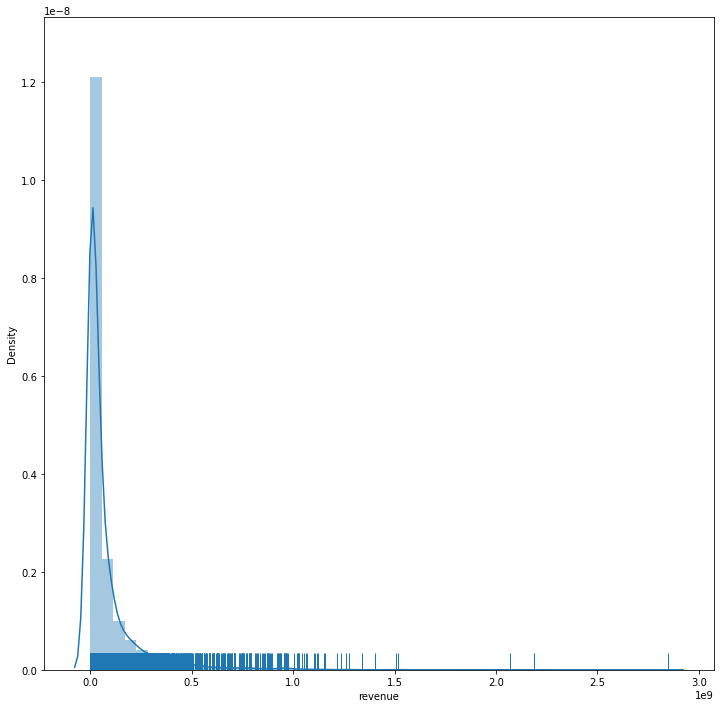

In [34]:
#view the revenue in a distplot (used to depict the distplot with different variations in it.)
plt.figure(figsize=(12,12))
sns.distplot(train_data['revenue'],rug=True)

In [35]:
#Return on investment (ROI) is a ratio between net profit and cost of investment. 
#A high ROI means the investment’s gains compare favorably to its cost. 
#As a performance measure, ROI is used to evaluate the efficiency of an investment or to compare the 
#efficiencies of several different investments.
roi_rev= train_data['revenue']
roi_budget= train_data['budget']
avg_profit_ratio =sum(roi_rev)/sum(roi_budget)
avg_profit_ratio

2.3680983757579948

In average, the profit ratio of a movie was 237%

In [36]:
correlation_df= train_data.copy()

In [37]:
correlation_df

id        budget                                             genres  \
0        1  1.400000e+07                     [{'id': 35, 'name': 'Comedy'}]   
1        2  4.000000e+07  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
2        3  3.300000e+06                      [{'id': 18, 'name': 'Drama'}]   
6        7  1.400000e+07  [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...   
8        9  3.216656e+07  [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...   
...    ...           ...                                                ...   
5014  7394  4.200000e+07                   [{'id': 53, 'name': 'Thriller'}]   
5015  7395  1.900000e+07  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
5016  7396  1.600000e+07                      [{'id': 18, 'name': 'Drama'}]   
5017  7397  2.000000e+06  [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...   
5018  7398  6.400000e+04                      [{'id': 18, 'name': 'Drama'}]   

        imdb_id original_language                            original_title  \
0     tt2637294                en                    Hot Tub Time Machine 2   
1     tt0368933                en  The Princess Diaries 2: Royal Engagement   
2     tt2582802                en                                  Whiplash   
6     tt0431021                en                            The Possession   
8     tt0117110                en                    Muppet Treasure Island   
...         ...               ...                                       ...   
5014  tt0218922                en                              Original Sin   
5015  tt0364751                en                          Without a Paddle   
5016  tt0084855                en                               The Verdict   
5017  tt3235888                en                                It Follows   
5018  tt0056663                fr      Vivre sa vie: film en douze tableaux   

                                               overview  popularity  \
0     When Lou, who has become the "father of the In...    6.575393   
1     Mia Thermopolis is now a college graduate and ...    8.248895   
2     Under the direction of a ruthless instructor, ...   64.299990   
6     A young girl buys an antique box at a yard sal...    7.286477   
8     After telling the story of Flint's last journe...    6.902423   
...                                                 ...         ...   
5014  A young man is plunged into a life of subterfu...    9.970359   
5015  Three friends, whose lives have been drifting ...    6.046516   
5016  Frank Galvin is a down-on-his luck lawyer, red...    9.596883   
5017  For 19-year-old Jay, fall should be about scho...   20.359336   
5018  Twelve episodic tales in the life of a Parisia...   11.305910   

                           poster_path  \
0     /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg   
1     /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg   
2     /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg   
6     /4QjzFuaZmB4btGnLwAgdp23BzIU.jpg   
8     /5A8gKzOrF9Z7tSUX6xd5dEx4NXf.jpg   
...                                ...   
5014  /i8FEQy5IWAqOzXm4uDHy2r3Swym.jpg   
5015  /oZDbFtTnTwW5GSfyaGFGaYxDBgD.jpg   
5016  /hh9sIE1PT7Pjq3n2fzHNEHh8Ogq.jpg   
5017  /4MrwJZr0R9LbyOgZqwLNmtzzxbu.jpg   
5018  /baz1c9dzsf5uhNuUYhXy7eudNJd.jpg   

                                   production_companies  \
0     [{'name': 'Paramount Pictures', 'id': 4}, {'na...   
1           [{'name': 'Walt Disney Pictures', 'id': 2}]   
2     [{'name': 'Bold Films', 'id': 2266}, {'name': ...   
6     [{'name': 'Ghost House Pictures', 'id': 768}, ...   
8     [{'name': 'Walt Disney Pictures', 'id': 2}, {'...   
...                                                 ...   
5014  [{'name': 'Intermedia Films', 'id': 763}, {'na...   
5015  [{'name': 'Paramount Pictures', 'id': 4}, {'na...   
5016  [{'name': 'Twentieth Century Fox Film Corporat...   
5017  [{'name': 'Northern Lights Films', 'id': 8714}...   
5018  [{'name': 'Pathé Consortium Cinéma', 'id': 220...   

                                   producti

In [38]:
correlation_df= correlation_df.drop(columns=['id','genres','imdb_id','original_language','original_title',
                                             'overview','poster_path','production_companies','production_countries',
                                             'release_date','spoken_languages','status','title','cast','crew'])

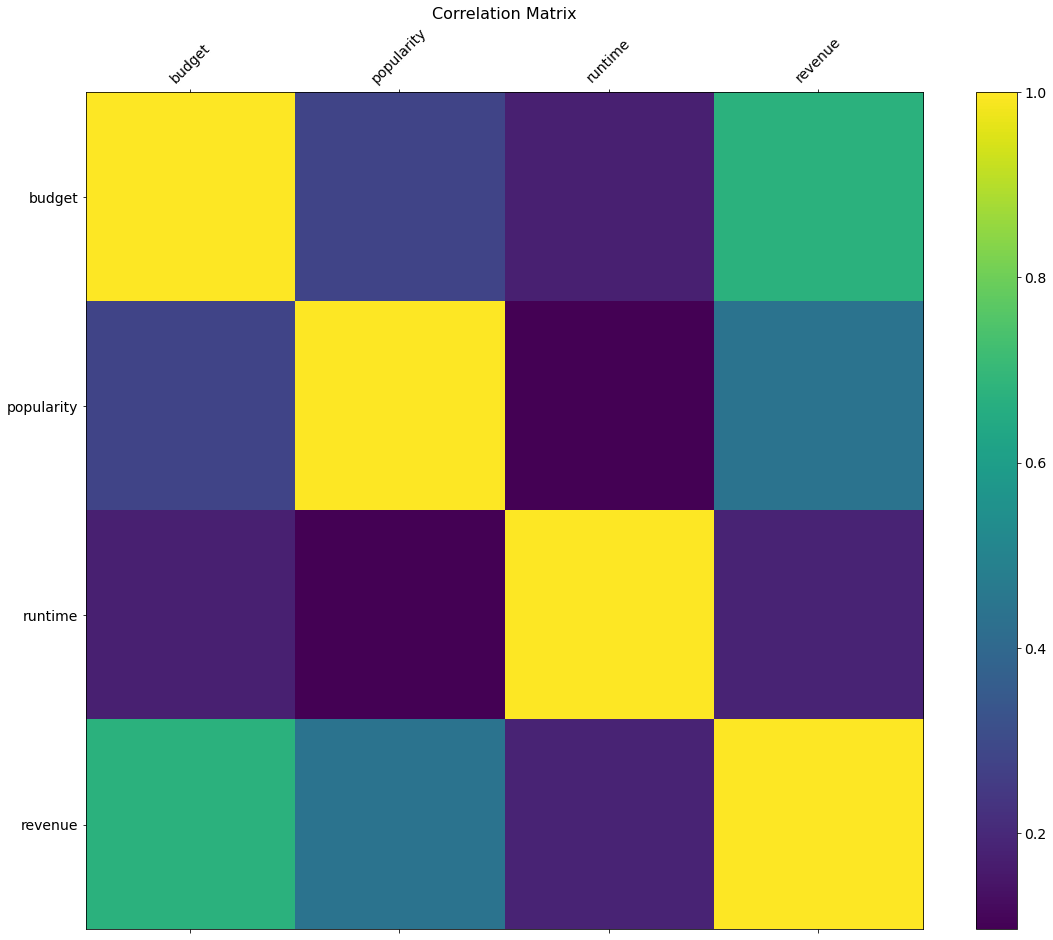

In [39]:
f = plt.figure(figsize=(19, 15))
plt.matshow(correlation_df.corr(), fignum=f.number)
plt.xticks(range(correlation_df.select_dtypes(['number']).shape[1]), correlation_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(correlation_df.select_dtypes(['number']).shape[1]), correlation_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [40]:
corr = correlation_df.corr()
corr.style.background_gradient(cmap='coolwarm')

as expected, budget and revenue are the highest correlated at 0.67

In [41]:
#attempt to evenly distribute revenue data with log
train_data['logrevenue'] = np.log1p(train_data['revenue'])

/Users/meredithgray/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='logrevenue', ylabel='Density'>

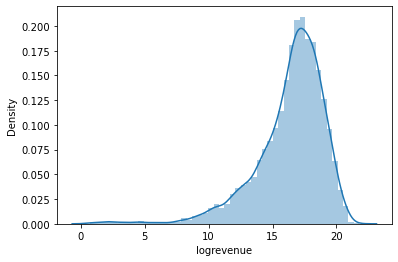

In [42]:
sns.distplot(train_data['logrevenue'])

In [43]:
#Lets look at some plots to see how some of the data is distributed and correlated 

<AxesSubplot:xlabel='revenue', ylabel='budget'>

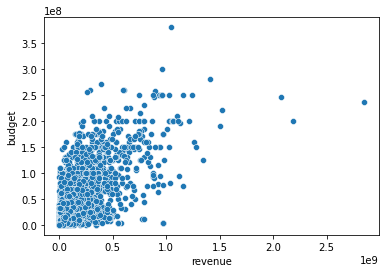

In [44]:
sns.scatterplot(x='revenue',y='budget',data=train_data)

<AxesSubplot:xlabel='revenue', ylabel='popularity'>

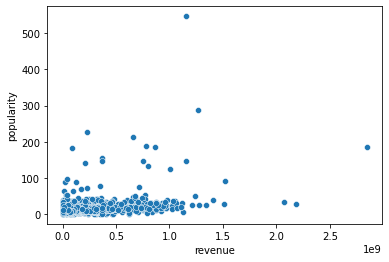

In [45]:
sns.scatterplot(x='revenue',y='popularity',data=train_data)

<AxesSubplot:xlabel='count', ylabel='original_language'>

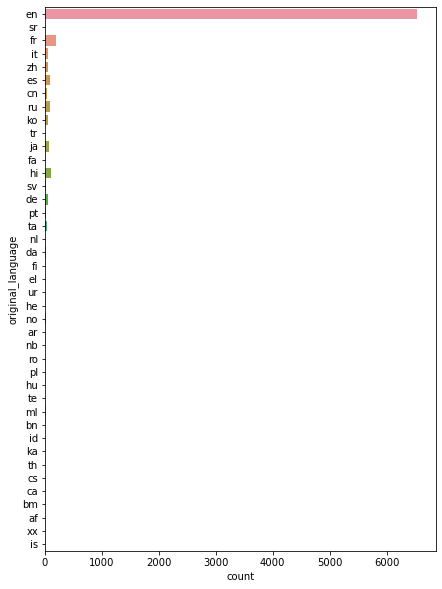

In [46]:
#we assume that en will be the highest in original language, but we can view it to get a better idead of the distribution
plt.figure(figsize=(7,10))
sns.countplot(y='original_language',data=train_data)

# JSON Parsing

In [47]:
#fixing genre, production company, production country, etc 

In [48]:
train_data["genres"] = train_data.genres.astype(str)

In [49]:
#fix some of the value formating, pull out genres from list 
def proc_json(string, key):
    try:
        data = eval(string)
        return ",".join([d[key] for d in data])
    except:
        return ''
    
train_data.genres = train_data.genres.apply(lambda x: proc_json(x, 'name'))

In [50]:
genres = []
for idx, val in train_data.genres.iteritems():
    gen_list = val.split(',')
    for gen in gen_list:
        if gen == '':
            continue

        if gen not in genres:
            genres.append(gen)

In [51]:
train_data['genres'].describe()

count      7501
unique     1447
top       Drama
freq        603
Name: genres, dtype: object

In [52]:
#we should consider only keeping the first of each list

# Turning Categorical Data into Numeric 

In [53]:
from numpy import mean
import time
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import re
from scipy.stats import pearsonr
import math
from statistics import median
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, RandomForestClassifier

In [54]:
#first: fixing the release date

In [55]:
def calc_prevalence(y):
     return (sum(y)/len(y))

In [56]:
#converting objects that are currently numeric to float 
#converting release date to datetime

train_data["budget"] = train_data.budget.astype(float)
train_data["runtime"] = train_data.runtime.astype(float)
train_data["revenue"] = train_data.revenue.astype(float)
train_data["release_date"] = pd.to_datetime(train_data["release_date"])

In [57]:
train_data["release_date"] = pd.to_datetime(train_data["release_date"], 
 format = "%Y-%m-%dT%", 
 errors = "coerce")

In [58]:
train_data["film_release_year"] = train_data["release_date"].dt.year
train_data["film_release_month"] = train_data["release_date"].dt.month
train_data["film_release_week"] = train_data["release_date"].dt.week
train_data["film_release_day"] = train_data["release_date"].dt.day

<ipython-input-58-9ed63cec739d>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train_data["film_release_week"] = train_data["release_date"].dt.week


<AxesSubplot:xlabel='film_release_month', ylabel='count'>

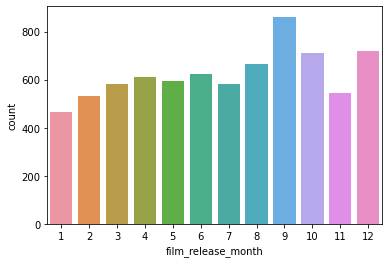

In [59]:
sns.countplot(x='film_release_month',data=train_data)

In [60]:
#It looks like the majority of films were release in September

<AxesSubplot:xlabel='film_release_day', ylabel='count'>

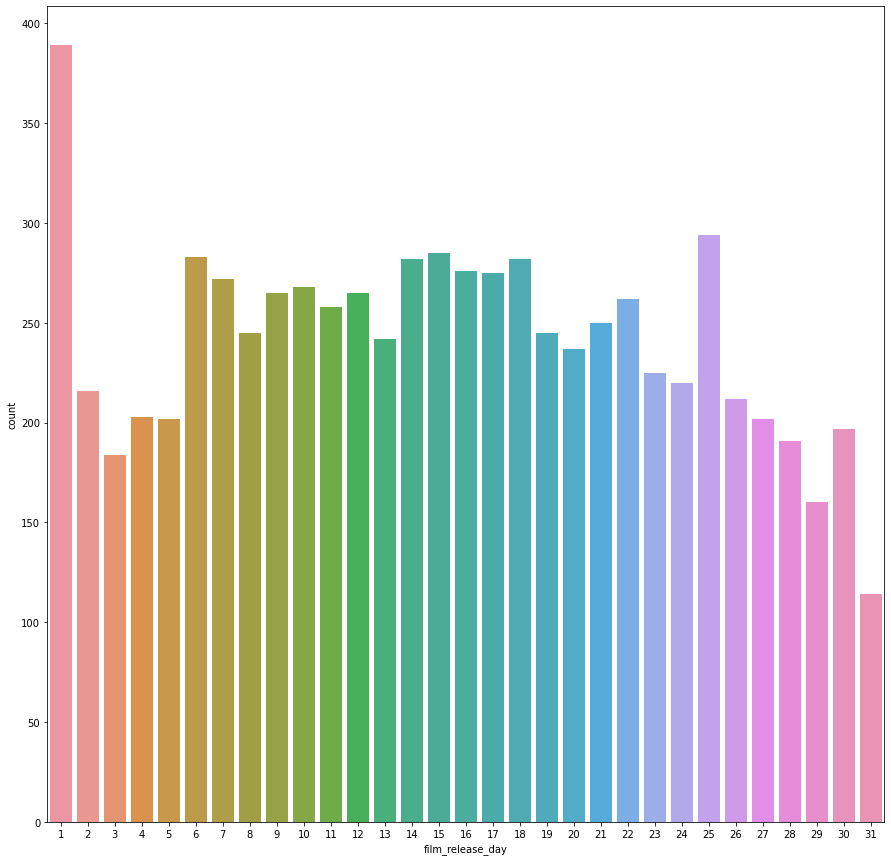

In [61]:
#Lets see about the beginning or ending of the month?
plt.figure(figsize=(15,15))
sns.countplot(x='film_release_day',data=train_data)

In [62]:
#the first day of each month is the most popular 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]),
 [Text(0, 0, '1972'),
  Text(1, 0, '1973'),
  Text(2, 0, '1974'),
  Text(3, 0, '1975'),
  Text(4, 0, '1976'),
  Text(5, 0, '1977'),
  Text(6, 0, '1978'),
  Text(7, 0, '1979'),
  Text(8, 0, '1980'),
  Text(9, 0, '1981'),
  Text(10, 0, '1982'),
  Text(11, 0, '1983'),
  Text(12, 0, '1984'),
  Text(13, 0, '1985'),
  Text(14, 0, '1986'),
  Text(15, 0, '1987'),
  Text(16, 0, '1988'),
  Text(17, 0, '1989'),
  Text(18, 0, '1990'),
  Text(19, 0, '1991'),
  Text(20, 0, '1992'),
  Text(21, 0, '1993'),
  Text(22, 0, '1994'),
  Text(23, 0, '1995'),
  Text(24, 0, '1

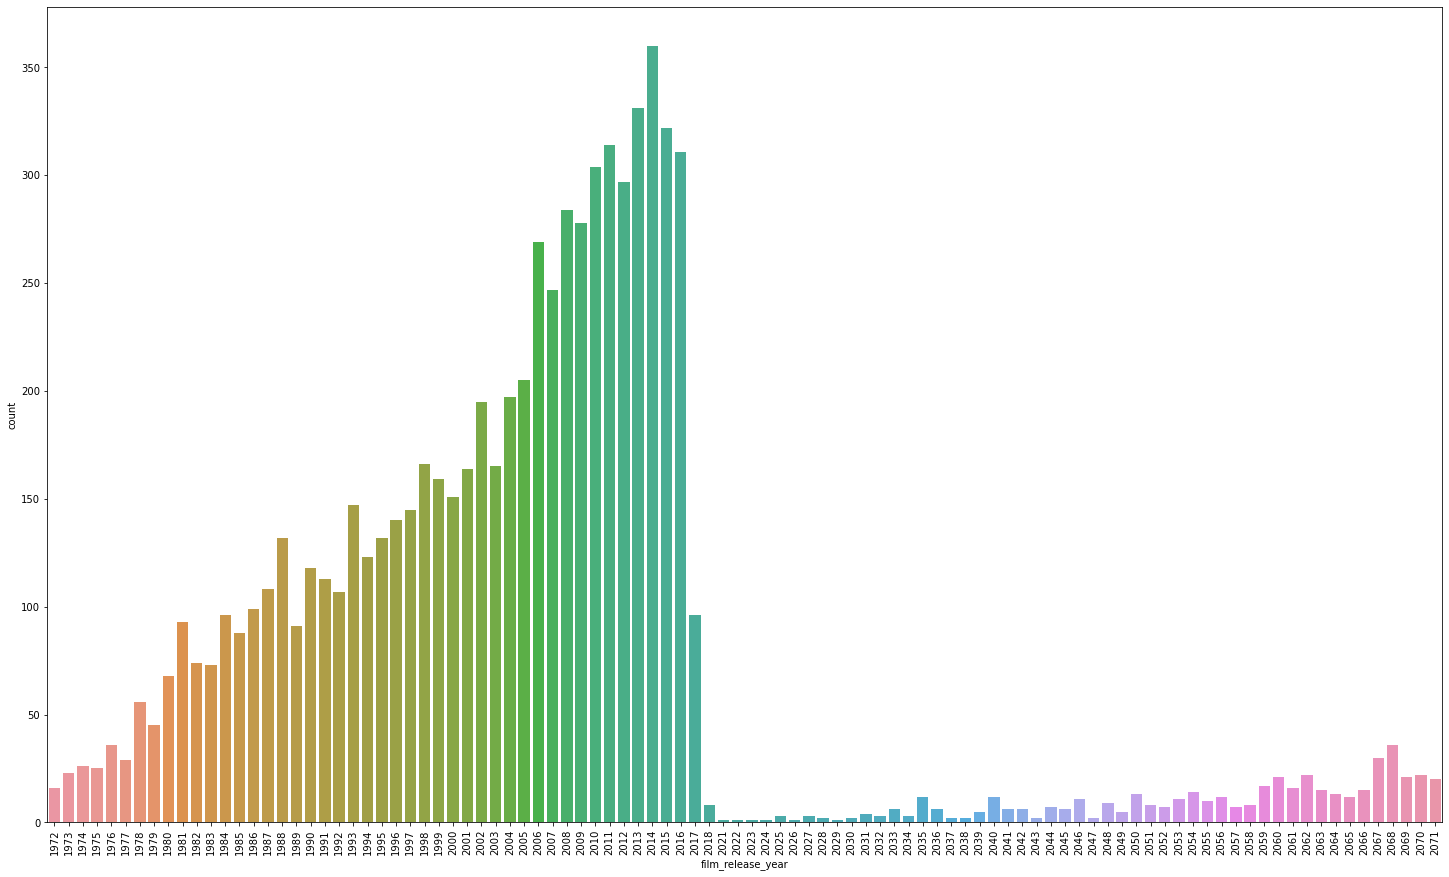

In [63]:
#release year popularity?
plt.figure(figsize=(25,15))
sns.countplot(x='film_release_year',data=train_data)
plt.xticks(rotation=90)

In [64]:
#We can see that something does not look right with the years

In [65]:
#fix it with 
train_data['film_release_year'] = train_data['release_date'].apply(lambda t: t.year if t.year < 2018 else t.year -100)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]),
 [Text(0, 0, '1918'),
  Text(1, 0, '1921'),
  Text(2, 0, '1922'),
  Text(3, 0, '1923'),
  Text(4, 0, '1924'),
  Text(5, 0, '1925'),
  Text(6, 0, '1926'),
  Text(7, 0, '1927'),
  Text(8, 0, '1928'),
  Text(9, 0, '1929'),
  Text(10, 0, '1930'),
  Text(11, 0, '1931'),
  Text(12, 0, '1932'),
  Text(13, 0, '1933'),
  Text(14, 0, '1934'),
  Text(15, 0, '1935'),
  Text(16, 0, '1936'),
  Text(17, 0, '1937'),
  Text(18, 0, '1938'),
  Text(19, 0, '1939'),
  Text(20, 0, '1940'),
  Text(21, 0, '1941'),
  Text(22, 0, '1942'),
  Text(23, 0, '1943'),
  Text(24, 0, '1

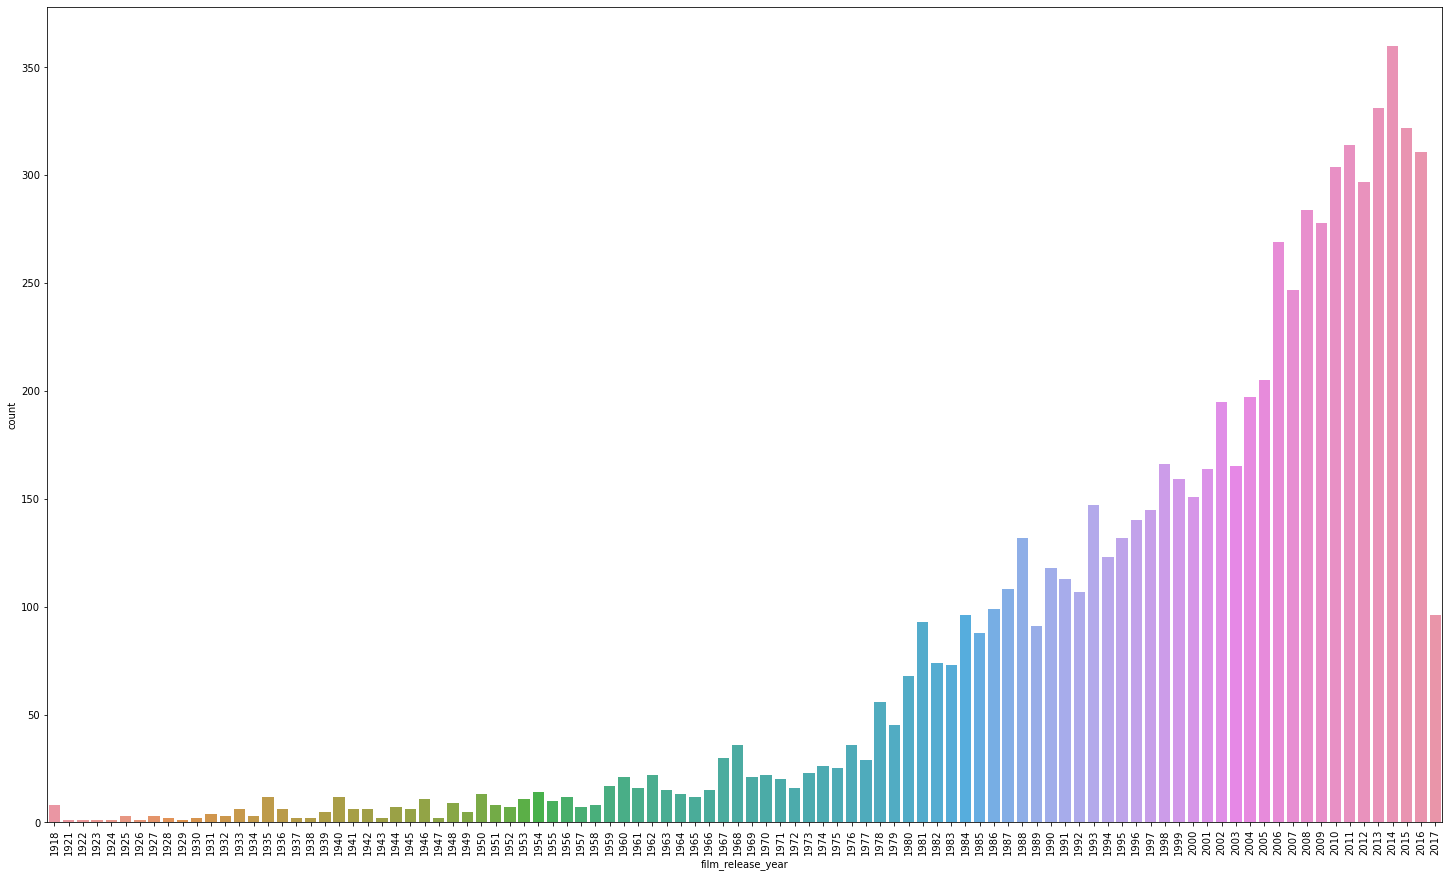

In [66]:
#make sure 
#release year popularity?
plt.figure(figsize=(25,15))
sns.countplot(x='film_release_year',data=train_data)
plt.xticks(rotation=90)

In [67]:
#fixed!

In [68]:
#2nd: Runtime
print(len(train_data[train_data['runtime']==0]))

3


In [69]:
#fixing thos 3 '0' values in the train_data

In [70]:
train_data['runtime'].replace(0, np.nan, inplace=True)

In [71]:
train_data.dropna(inplace=True)

In [72]:
#checking correlation between budget and the other features
import scipy.stats as stats
X = train_data[train_data['budget'] != 0]
for i in X.select_dtypes(include='number', exclude='datetime'):
    print(i, stats.pearsonr(X.budget, X[i]))

id (0.013401639841375384, 0.24591857611718154)
budget (1.0, 0.0)
popularity (0.28257956976057774, 1.1290309795390754e-137)
runtime (0.1761643419724832, 2.5200777994843187e-53)
revenue (0.671982486940382, 0.0)
logrevenue (0.37095346257364115, 2.6242279526996e-243)
film_release_year (0.26316432916762145, 5.250553489423155e-119)
film_release_month (0.0165813384227688, 0.15110086045336807)
film_release_week (0.014939829498793925, 0.19583432490745978)
film_release_day (0.014466858409919753, 0.21036722109169692)


In [73]:
#strongest correlations
#popularity 
#film_release_year

In [74]:
train_data= train_data.drop(columns=['poster_path'])

In [75]:
#do the same thing we did for genre for production company, country
train_data["production_countries"] = train_data.production_countries.astype(str)
train_data["production_companies"] = train_data.production_companies.astype(str)

In [76]:
def proc_json(string, key):
    try:
        data = eval(string)
        return ",".join([d[key] for d in data])
    except:
        return ''
    
train_data.production_countries = train_data.production_countries.apply(lambda x: proc_json(x, 'name'))
train_data.production_companies = train_data.production_companies.apply(lambda x: proc_json(x, 'name'))

In [77]:
train_data['production_company'] = train_data['production_companies'].str.split(',').str[0]
train_data['production_country'] = train_data['production_countries'].str.split(',').str[0]


In [78]:
train_data= train_data.drop(columns=['production_companies','production_countries'])

In [79]:
train_data['production_company'].describe()

count                   7498
unique                  1931
top       Universal Pictures
freq                     445
Name: production_company, dtype: object

In [80]:
#Keep in mind that all the categorical variables are nominal so they will need to be 
#onehotencoded NOT Intenger Encoding

In [81]:
#import sklearn dependencies 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [82]:
train_data.head()

id        budget                                genres    imdb_id  \
0   1  1.400000e+07                                Comedy  tt2637294   
1   2  4.000000e+07           Comedy,Drama,Family,Romance  tt0368933   
2   3  3.300000e+06                                 Drama  tt2582802   
6   7  1.400000e+07                       Horror,Thriller  tt0431021   
8   9  3.216656e+07  Action,Comedy,Music,Family,Adventure  tt0117110   

  original_language                            original_title  \
0                en                    Hot Tub Time Machine 2   
1                en  The Princess Diaries 2: Royal Engagement   
2                en                                  Whiplash   
6                en                            The Possession   
8                en                    Muppet Treasure Island   

                                            overview  popularity release_date  \
0  When Lou, who has become the "father of the In...    6.575393   2015-02-20   
1  Mia Thermopolis is now a college graduate and ...    8.248895   2004-08-06   
2  Under the direction of a ruthless instructor, ...   64.299990   2014-10-10   
6  A young girl buys an antique box at a yard sal...    7.286477   2012-08-30   
8  After telling the story of Flint's last journe...    6.902423   1996-02-16   

   runtime                          spoken_languages    status  \
0     93.0  [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1    113.0  [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2    105.0  [{'iso_639_1': 'en', 'name': 'English'}]  Released   
6     92.0  [{'iso_639_1': 'en', 'name': 'English'}]  Released   
8    100.0  [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                      title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
6                            The Possession   
8                    Muppet Treasure Island   

                                                cast  \
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
1  [{'cast_id': 1, 'character': 'Mia Thermopolis'...   
2  [{'cast_id': 5, 'character': 'Andrew Neimann',...   
6  [{'cast_id': 23, 'character': 'Clyde', 'credit...   
8  [{'cast_id': 1, 'character': 'Long John Silver...   

                                                crew     revenue  logrevenue  \
0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651.0   16.326300   
1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435.0   18.370959   
2  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  13092000.0   16.387512   
6  [{'credit_id': '52fe4981c3a368484e12ee29', 'de...  85446075.0   18.263396   
8  [{'credit_id': '52fe43c89251416c7501deb3', 'de...  34327391.0   17.351454   

   film_release_year  film_release_month  film_release_week  film_release_day  \
0               2015                   2                  8                20   
1               2004                   8                 32                 6   
2               2014                  10                 41                10   
6               2012                   8                 35                30   
8               1996                   2                  7                16   

     production_company        production_country  
0    Paramount Pictures  United States of America  
1  Walt Disney Pictures  United States of America  
2            Bold Films  United States of America  
6  Ghost House Pictures  United States of America  
8  Walt Disney Pictures  United States of America

In [83]:
my_code= train_data.copy()

# Converting Categorical Data to numeric with OneHotEncoding 
We need to convert:
- genre
- production company
- production country
- original language 

In [84]:
#creating numerical data for the genre column 
genre_column_names = []
for gen in genres:
    col_name = 'genre_' + gen.replace(' ', '_')
    train_data[col_name] = train_data.genres.str.contains(gen).astype('uint8')
    genre_column_names.append(col_name)

In [85]:
train_data = pd.get_dummies(train_data, columns = ["original_language"])
train_data = pd.get_dummies(train_data, columns = ["production_company"])
train_data = pd.get_dummies(train_data, columns = ["production_country"])
#train_data = pd.get_dummies(train_data, columns = ["production_company"])

In [86]:
#drop columns 
train_data= train_data.drop(columns=['genres','id','imdb_id','original_title','overview','status','title','cast',
                                     'crew','release_date','spoken_languages'])

In [87]:
train_data.reset_index(inplace=True)

In [88]:
print(train_data.shape)
train_data.head(5)

(7498, 2077)


index        budget  popularity  runtime     revenue  logrevenue  \
0      0  1.400000e+07    6.575393     93.0  12314651.0   16.326300   
1      1  4.000000e+07    8.248895    113.0  95149435.0   18.370959   
2      2  3.300000e+06   64.299990    105.0  13092000.0   16.387512   
3      6  1.400000e+07    7.286477     92.0  85446075.0   18.263396   
4      8  3.216656e+07    6.902423    100.0  34327391.0   17.351454   

   film_release_year  film_release_month  film_release_week  film_release_day  \
0               2015                   2                  8                20   
1               2004                   8                 32                 6   
2               2014                  10                 41                10   
3               2012                   8                 35                30   
4               1996                   2                  7                16   

   genre_Comedy  genre_Drama  genre_Family  genre_Romance  genre_Horror  \
0             1            0             0              0             0   
1             1            1             1              1             0   
2             0            1             0              0             0   
3             0            0             0              0             1   
4             1            0             1              0             0   

   genre_Thriller  genre_Action  genre_Music  genre_Adventure  genre_Crime  \
0               0             0            0                0            0   
1               0             0            0                0            0   
2               0             0            0                0            0   
3               1             0            0                0            0   
4               0             1            1                1            0   

   genre_Science_Fiction  genre_Mystery  genre_Foreign  genre_Animation  \
0                      0              0              0                0   
1                      0              0              0                0   
2                      0              0              0                0   
3                      0              0              0                0   
4                      0              0              0                0   

   genre_Fantasy  genre_War  genre_Western  genre_Documentary  genre_History  \
0              0          0              0                  0              0   
1              0          0              0                  0              0   
2              0          0              0                  0              0   
3              0          0              0                  0              0   
4              0          0              0                  0              0   

   genre_TV_Movie  original_language_af  original_language_ar  \
0               0                     0                     0   
1               0                     0                     0   
2               0                     0                     0   
3               0                     0                     0   
4               0                     0                     0   

   original_language_bm  original_language_bn  original_language_ca  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   original_language_cn  original_language_cs  original_language_da  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                   

In [89]:
train_data= train_data.drop(columns=['logrevenue'])

In [90]:
train_data= train_data.drop(columns=['index'])

# Random Forest

In [91]:
X = train_data.drop('revenue', axis=1).copy()
y = train_data['revenue'].copy()

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
clf = RandomForestClassifier(random_state=42, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

In [ ]:
feature_importances = clf.feature_importances_

In [ ]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [86]:
from sklearn.feature_selection import SelectFromModel

In [87]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

NameError: name 'clf' is not defined

In [324]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [325]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9998221273568125
Testing Score: 0.9984


In [326]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9996442547136251
Testing Score: 0.9984


# Building our Models

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [330]:
X = train_data.drop(['revenue'],axis=1)
y = train_data['revenue']

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
print("Shape of X_train is : ",X_train.shape[0])
print("Shape of y_train is : ",y_train.shape[0])
print("Shape of X_test is : ",X_test.shape[0])
print("Shape of y_test is : ",y_test.shape[0])

Shape of X_train is :  5622
Shape of y_train is :  5622
Shape of X_test is :  1875
Shape of y_test is :  1875


In [331]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [332]:
lr_ = LinearRegression()
lr_.fit(X_train,y_train)
pred = lr_.predict(X_test)

/Users/meredithgray/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


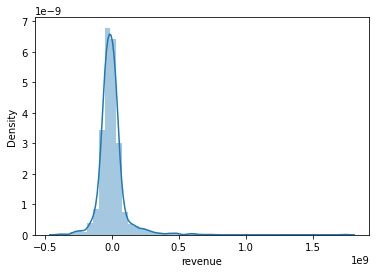

In [333]:
sns.distplot((y_test-pred),bins=50)
plt.show()

In [334]:
def rmsle(y_true, y_pred):
    return 'rmsle', np.sqrt(np.mean(np.power(np.log1p(y_pred) - np.log1p(y_true), 2))), False

In [335]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('RMSLE:', rmsle(y_test, pred))

MAE: 59016620.45023621
MSE: 1.0242799976337052e+16
RMSE: 101206719.02762708
RMSLE: ('rmsle', 2.765122188230637, False)


<ipython-input-334-b98b27b53830>:2: RuntimeWarning: invalid value encountered in log1p
  return 'rmsle', np.sqrt(np.mean(np.power(np.log1p(y_pred) - np.log1p(y_true), 2))), False


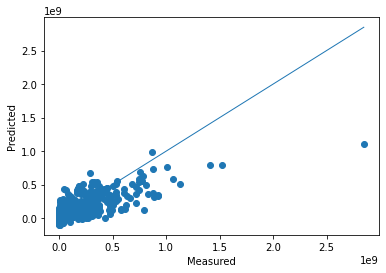

In [336]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


In [337]:
def test_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    reg = model.fit(X_train_scaled, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')
    plt.show()    

In [338]:
# Create data
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
data = [X_train_scaled, X_test_scaled, y_train, y_test]

In [339]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR

In [340]:
test_model(LinearRegression(), data)

test_model(KNeighborsRegressor(), data)
test_model(RandomForestRegressor(), data)
test_model(ExtraTreesRegressor(), data)
test_model(AdaBoostRegressor(), data)
test_model(SVR(C=1.0, epsilon=0.2), data)

Model: LinearRegression
Train score: 0.5501041443452876
Test Score: -1.9571451650235797e+20

Model: KNeighborsRegressor
Train score: 0.6874450862485559
Test Score: 0.5501033171533338

Model: RandomForestRegressor
Train score: 0.9204739660799426
Test Score: 0.6611455185263885

Model: ExtraTreesRegressor
Train score: 0.9600097860187234
Test Score: 0.6591491440435204

Model: AdaBoostRegressor
Train score: 0.30976038967017505
Test Score: 0.2372571414841631

Model: SVR
Train score: -0.1305254270096443
Test Score: -0.13155866778886183



# XGBoost 
# Extreme Gradient Boosting Model 
Boosting is an ensemble technique where new models are added to correct the errors made by existing models. Models are added sequentially until no further improvements can be made. This approach supports both regression and classification predictive modeling problems.

Preliminary XGBOOST Model

Optimize parameters with cross validation and grid search 

In [61]:
import xgboost as xgb
from sklearn.model_selection import train_test_split 
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [102]:
my_code= my_code.drop(columns=['id','imdb_id','original_title','overview','spoken_languages',
                               'status','title','cast','crew','logrevenue'])

In [103]:
my_code.head()

budget                                genres original_language  \
0  1.400000e+07                                Comedy                en   
1  4.000000e+07           Comedy,Drama,Family,Romance                en   
2  3.300000e+06                                 Drama                en   
6  1.400000e+07                       Horror,Thriller                en   
8  3.216656e+07  Action,Comedy,Music,Family,Adventure                en   

   popularity release_date  runtime     revenue  film_release_year  \
0    6.575393   2015-02-20     93.0  12314651.0               2015   
1    8.248895   2004-08-06    113.0  95149435.0               2004   
2   64.299990   2014-10-10    105.0  13092000.0               2014   
6    7.286477   2012-08-30     92.0  85446075.0               2012   
8    6.902423   1996-02-16    100.0  34327391.0               1996   

   film_release_month  film_release_week  film_release_day  \
0                   2                  8                20   
1                   8                 32                 6   
2                  10                 41                10   
6                   8                 35                30   
8                   2                  7                16   

     production_company        production_country  
0    Paramount Pictures  United States of America  
1  Walt Disney Pictures  United States of America  
2            Bold Films  United States of America  
6  Ghost House Pictures  United States of America  
8  Walt Disney Pictures  United States of America

In [107]:
my_code['production_company'].replace(' ','_', regex=True, inplace=True)
my_code['production_country'].replace(' ','_', regex=True, inplace=True)
my_code.head()

budget                                genres original_language  \
0  1.400000e+07                                Comedy                en   
1  4.000000e+07           Comedy,Drama,Family,Romance                en   
2  3.300000e+06                                 Drama                en   
6  1.400000e+07                       Horror,Thriller                en   
8  3.216656e+07  Action,Comedy,Music,Family,Adventure                en   

   popularity release_date  runtime     revenue  film_release_year  \
0    6.575393   2015-02-20     93.0  12314651.0               2015   
1    8.248895   2004-08-06    113.0  95149435.0               2004   
2   64.299990   2014-10-10    105.0  13092000.0               2014   
6    7.286477   2012-08-30     92.0  85446075.0               2012   
8    6.902423   1996-02-16    100.0  34327391.0               1996   

   film_release_month  film_release_week  film_release_day  \
0                   2                  8                20   
1                   8                 32                 6   
2                  10                 41                10   
6                   8                 35                30   
8                   2                  7                16   

     production_company        production_country  
0    Paramount_Pictures  United_States_of_America  
1  Walt_Disney_Pictures  United_States_of_America  
2            Bold_Films  United_States_of_America  
6  Ghost_House_Pictures  United_States_of_America  
8  Walt_Disney_Pictures  United_States_of_America

In [108]:
my_code.dtypes

budget                       float64
genres                        object
original_language             object
popularity                   float64
release_date          datetime64[ns]
runtime                      float64
revenue                      float64
film_release_year              int64
film_release_month             int64
film_release_week              int64
film_release_day               int64
production_company            object
production_country            object
dtype: object

In [109]:
my_code= my_code.drop(columns=['release_date'])

In [110]:
my_code.replace(' ','_', regex=True, inplace=True)

In [111]:
my_code.head()

budget                                genres original_language  \
0  1.400000e+07                                Comedy                en   
1  4.000000e+07           Comedy,Drama,Family,Romance                en   
2  3.300000e+06                                 Drama                en   
6  1.400000e+07                       Horror,Thriller                en   
8  3.216656e+07  Action,Comedy,Music,Family,Adventure                en   

   popularity  runtime     revenue  film_release_year  film_release_month  \
0    6.575393     93.0  12314651.0               2015                   2   
1    8.248895    113.0  95149435.0               2004                   8   
2   64.299990    105.0  13092000.0               2014                  10   
6    7.286477     92.0  85446075.0               2012                   8   
8    6.902423    100.0  34327391.0               1996                   2   

   film_release_week  film_release_day    production_company  \
0                  8                20    Paramount_Pictures   
1                 32                 6  Walt_Disney_Pictures   
2                 41                10            Bold_Films   
6                 35                30  Ghost_House_Pictures   
8                  7                16  Walt_Disney_Pictures   

         production_country  
0  United_States_of_America  
1  United_States_of_America  
2  United_States_of_America  
6  United_States_of_America  
8  United_States_of_America

Split dataframe into Independent and Dependent Variables. The columns that we are going to use to predict & the column that we are attempting to predict.

In [112]:
X= my_code.drop('revenue', axis=1).copy()
X.head()

budget                                genres original_language  \
0  1.400000e+07                                Comedy                en   
1  4.000000e+07           Comedy,Drama,Family,Romance                en   
2  3.300000e+06                                 Drama                en   
6  1.400000e+07                       Horror,Thriller                en   
8  3.216656e+07  Action,Comedy,Music,Family,Adventure                en   

   popularity  runtime  film_release_year  film_release_month  \
0    6.575393     93.0               2015                   2   
1    8.248895    113.0               2004                   8   
2   64.299990    105.0               2014                  10   
6    7.286477     92.0               2012                   8   
8    6.902423    100.0               1996                   2   

   film_release_week  film_release_day    production_company  \
0                  8                20    Paramount_Pictures   
1                 32                 6  Walt_Disney_Pictures   
2                 41                10            Bold_Films   
6                 35                30  Ghost_House_Pictures   
8                  7                16  Walt_Disney_Pictures   

         production_country  
0  United_States_of_America  
1  United_States_of_America  
2  United_States_of_America  
6  United_States_of_America  
8  United_States_of_America

In [113]:
y=my_code['revenue'].copy()
y.head()

0    12314651.0
1    95149435.0
2    13092000.0
6    85446075.0
8    34327391.0
Name: revenue, dtype: float64

Lets format X so it is suitable for an XGBoost Model

In [114]:
X.dtypes

budget                float64
genres                 object
original_language      object
popularity            float64
runtime               float64
film_release_year       int64
film_release_month      int64
film_release_week       int64
film_release_day        int64
production_company     object
production_country     object
dtype: object

We need to turn all object types into int with onehotencoding. Why? Because making them continuous variables would group the wrong variables.

In [115]:
pd.get_dummies(X, columns=['genres']).head()

budget original_language  popularity  runtime  film_release_year  \
0  1.400000e+07                en    6.575393     93.0               2015   
1  4.000000e+07                en    8.248895    113.0               2004   
2  3.300000e+06                en   64.299990    105.0               2014   
6  1.400000e+07                en    7.286477     92.0               2012   
8  3.216656e+07                en    6.902423    100.0               1996   

   film_release_month  film_release_week  film_release_day  \
0                   2                  8                20   
1                   8                 32                 6   
2                  10                 41                10   
6                   8                 35                30   
8                   2                  7                16   

     production_company        production_country  genres_Action  \
0    Paramount_Pictures  United_States_of_America              0   
1  Walt_Disney_Pictures  United_States_of_America              0   
2            Bold_Films  United_States_of_America              0   
6  Ghost_House_Pictures  United_States_of_America              0   
8  Walt_Disney_Pictures  United_States_of_America              0   

   genres_Action,Adventure  \
0                        0   
1                        0   
2                        0   
6                        0   
8                        0   

   genres_Action,Adventure,Animation,Comedy,Drama,Family  \
0                                                  0       
1                                                  0       
2                                                  0       
6                                                  0       
8                                                  0       

   genres_Action,Adventure,Animation,Comedy,Family  \
0                                                0   
1                                                0   
2                                                0   
6                                                0   
8                                                0   

   genres_Action,Adventure,Animation,Comedy,Family,Fantasy,Science_Fiction  \
0                                                  0                         
1                                                  0                         
2                                                  0                         
6                                                  0                         
8                                                  0                         

   genres_Action,Adventure,Animation,Family  \
0                                         0   
1                                         0   
2                                         0   
6                                         0   
8                                         0   

   genres_Action,Adventure,Animation,Fantasy  \
0                                          0   
1                                          0   
2                                          0   
6                                          0   
8                                          0   

   genres_Action,Adventure,Animation,Science_Fiction  \
0                                                  0   
1                                                  0   
2                                                  0   
6                                                  0   
8                                                  0   

   genres_Action,Adventure,Animation,Science_Fiction,Thriller  \
0                                                  0            
1                                                  0            
2                                                  0            
6                                                  0            
8                                                  0            

   genres_Action,Adventure,Comedy  genres_Action,Adventure,Comedy,Crime  \
0                               0                    

In [125]:
X_encoded= pd.get_dummies(X, columns=['genres',
                                      'original_language',
                                      'production_company',
                                      'production_country'])
X_encoded.head()

budget  popularity  runtime  film_release_year  film_release_month  \
0  1.400000e+07    6.575393     93.0               2015                   2   
1  4.000000e+07    8.248895    113.0               2004                   8   
2  3.300000e+06   64.299990    105.0               2014                  10   
6  1.400000e+07    7.286477     92.0               2012                   8   
8  3.216656e+07    6.902423    100.0               1996                   2   

   film_release_week  film_release_day  genres_Action  \
0                  8                20              0   
1                 32                 6              0   
2                 41                10              0   
6                 35                30              0   
8                  7                16              0   

   genres_Action,Adventure  \
0                        0   
1                        0   
2                        0   
6                        0   
8                        0   

   genres_Action,Adventure,Animation,Comedy,Drama,Family  \
0                                                  0       
1                                                  0       
2                                                  0       
6                                                  0       
8                                                  0       

   genres_Action,Adventure,Animation,Comedy,Family  \
0                                                0   
1                                                0   
2                                                0   
6                                                0   
8                                                0   

   genres_Action,Adventure,Animation,Comedy,Family,Fantasy,Science_Fiction  \
0                                                  0                         
1                                                  0                         
2                                                  0                         
6                                                  0                         
8                                                  0                         

   genres_Action,Adventure,Animation,Family  \
0                                         0   
1                                         0   
2                                         0   
6                                         0   
8                                         0   

   genres_Action,Adventure,Animation,Fantasy  \
0                                          0   
1                                          0   
2                                          0   
6                                          0   
8                                          0   

   genres_Action,Adventure,Animation,Science_Fiction  \
0                                                  0   
1                                                  0   
2                                                  0   
6                                                  0   
8                                                  0   

   genres_Action,Adventure,Animation,Science_Fiction,Thriller  \
0                                                  0            
1                                                  0            
2                                                  0            
6                                                  0            
8                                                  0            

   genres_Action,Adventure,Comedy  genres_Action,Adventure,Comedy,Crime  \
0                               0                                     0   
1                               0                                     0   
2                               0                                     0   
6                               0                                     0   
8                               0                                     0   

   genres_Action,Adventure,Comedy,Crime,Drama  \
0                                           0   
1     

In [126]:
X_encoded

budget  popularity  runtime  film_release_year  \
0     1.400000e+07    6.575393     93.0               2015   
1     4.000000e+07    8.248895    113.0               2004   
2     3.300000e+06   64.299990    105.0               2014   
6     1.400000e+07    7.286477     92.0               2012   
8     3.216656e+07    6.902423    100.0               1996   
...            ...         ...      ...                ...   
5014  4.200000e+07    9.970359    118.0               2001   
5015  1.900000e+07    6.046516     95.0               2004   
5016  1.600000e+07    9.596883    129.0               1982   
5017  2.000000e+06   20.359336    100.0               2015   
5018  6.400000e+04   11.305910     85.0               1962   

      film_release_month  film_release_week  film_release_day  genres_Action  \
0                      2                  8                20              0   
1                      8                 32                 6              0   
2                     10                 41                10              0   
6                      8                 35                30              0   
8                      2                  7                16              0   
...                  ...                ...               ...            ...   
5014                   8                 31                 3              0   
5015                   8                 34                20              0   
5016                  12                 49                 8              0   
5017                   2                  6                 4              0   
5018                   9                 38                20              0   

      genres_Action,Adventure  \
0                           0   
1                           0   
2                           0   
6                           0   
8                           0   
...                       ...   
5014                        0   
5015                        0   
5016                        0   
5017                        0   
5018                        0   

      genres_Action,Adventure,Animation,Comedy,Drama,Family  \
0                                                     0       
1                                                     0       
2                                                     0       
6                                                     0       
8                                                     0       
...                                                 ...       
5014                                                  0       
5015                                                  0       
5016                                                  0       
5017                                                  0       
5018                                                  0       

      genres_Action,Adventure,Animation,Comedy,Family  \
0                                                   0   
1                                                   0   
2                                                   0   
6                                                   0   
8                                                   0   
...                                               ...   
5014                                                0   
5015                                                0   
5016                                                0   
5017                                                0   
5018                                                0   

      genres_Action,Adventure,Animation,Comedy,Family,Fantasy,Science_Fiction  \
0                                                     0                         
1                                                     0                         
2                                                     0                         
6                                                     0                         
8                                                     0       

In [127]:
y.unique()

array([1.2314651e+07, 9.5149435e+07, 1.3092000e+07, ..., 5.3977250e+07,
       1.4674076e+07, 2.4517000e+04])

XGBoost is more productive. It uses sparce matricies, only keeping track of the 1s from the onehotencoding and does not allocate memory for 0s. It checks to see if memory is allocated for each variable, if it is allocated is goes in certain direction (right or left) 

We will now split the data into testing and training datasets. 

In [129]:
X_train, X_test, y_train, y_test= train_test_split(X_encoded, y, random_state= 42)

In [ ]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
print(model)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
rfmodel = RandomForestRegressor(n_estimators = 200, min_samples_leaf=8,min_samples_split=12,max_depth=18,oob_score = True, n_jobs = 4, max_features = "auto")

In [ ]:
rfmodel.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
start1=time.time()
test1=rfmodel.predict(X_test)
end1= time.time()
t1=end1-start1
t1

In [ ]:
rfmodel.score(X_test,y_test)

In [ ]:
rfmodel.fit(X_train, Y_train)

In [ ]:
#save predictions
test_data['revenue'] = rfmodel.predict(X_test)
test_data[['id','revenue']].to_csv('submission_rf.csv', index=False)
test[['id','revenue']].head()